In [35]:
import string

In [36]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [37]:
x=['#Coronavirus','#Covid19','#who','#india','#UN','#UnitedNation','#PMO','#lockdown']
for i in x:
    def tweets():
        import GetOldTweets3 as got
        tweetCriteria =got.manager.TweetCriteria().setQuerySearch(i) \
            .setSince("2020-02-28") \
            .setUntil("2020-03-30") \
            .setMaxTweets(1000)
        # Creation of list that contains all tweets
        tweets = got.manager.TweetManager.getTweets(tweetCriteria)
        # Creating list of chosen tweet data
        text_tweets = [[tweet.text] for tweet in tweets]
        return text_tweets
    

In [38]:
# reading text file
text = ""
text_tweets = tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [39]:
text_tweets

[['#Lockdown #AniesBaswedan #Jokowi #Presiden #Pemerintah #Karantina #karantinaWilayah #Jakarta #MahfudMD #Polri #GubernurDKI #DKIJakarta #VirusCorona #covid19 #coronavirus Corona https://kaltim.tribunnews.com/2020/03/30/bukan-lockdown-anies-baswedan-surati-jokowi-minta-pemerintah-lakukan-karantina-wilayah-jakarta via @tribunkaltim'],
 ['#funny #funnymemes #dbnation #dbfollowtrain #lockdown #quarantine #lockdownhumour #covid_19 https://www.instagram.com/p/B-VjzlOJg1h/?igshid=tuumecpn3b0h'],
 ["All for protecting the elderly and vulnerable. That includes morale. But sadly when you give some police new powers they'll take them to the limit. Why the #Lockdown period should be a bare minimum for the under 70s and able-bodied. "],
 ['I’d rather get corona then eat subway #Quarantine #QuarantineLife #lockdown #coronavirus'],
 ['Facebook Live #Lockdown #Gigs #Live #Festival #online this Saturday 4th April Musicians, want a 45 minute slot in the schedule? We are still accepting applications. V

In [40]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [41]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' happy': 11, ' sad': 8, ' fearful': 7, ' attracted': 6, 'anxious': 6, 'fearful': 5, ' powerless': 5, ' angry': 4, ' attached': 4, ' entitled': 4, 'panic': 4, ' codependent': 3, 'happy': 2, ' average': 2, ' hated': 2, ' alone': 2, 'pain': 1, 'attracted': 1, ' bored': 1, ' safe': 1, ' demoralized': 1, ' ecstatic': 1, ' free': 1, ' lost': 1, ' esteemed': 1, ' adequate': 1, ' fearless': 1, ' surprise': 1, ' independent': 1, ' focused': 1, ' loved': 1, ' anxious': 1})


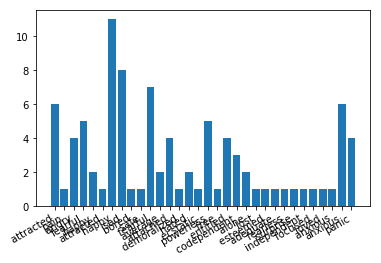

In [42]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [43]:
text_tweets1 ="""[['#Lockdown #AniesBaswedan #Jokowi #Presiden #Pemerintah #Karantina #karantinaWilayah #Jakarta #MahfudMD #Polri #GubernurDKI #DKIJakarta #VirusCorona #covid19 #coronavirus Corona https://kaltim.tribunnews.com/2020/03/30/bukan-lockdown-anies-baswedan-surati-jokowi-minta-pemerintah-lakukan-karantina-wilayah-jakarta via @tribunkaltim'],
 ['#funny #funnymemes #dbnation #dbfollowtrain #lockdown #quarantine #lockdownhumour #covid_19 https://www.instagram.com/p/B-VjzlOJg1h/?igshid=tuumecpn3b0h'],
 ["All for protecting the elderly and vulnerable. That includes morale. But sadly when you give some police new powers they'll take them to the limit. Why the #Lockdown period should be a bare minimum for the under 70s and able-bodied. "],
 ['I’d rather get corona then eat subway #Quarantine #QuarantineLife #lockdown #coronavirus'],
 ['Facebook Live #Lockdown #Gigs #Live #Festival #online this Saturday 4th April Musicians, want a 45 minute slot in the schedule? We are still accepting applications. Viewers, music lovers, come and join us for free music live and in your house! https://www.facebook.com/groups/675916556494400/'],
 ['#QuarantineLife #lockdown #LockdownWithoutPlan #IndiaDeservesBetter #IndiaFightsCorona'],
 ["1 hour to #lockdown in Ghana. Can't wait"],
 ['Me in 2030 after surviving #Covid_19 #lockdown #SocialDistancing #April30th'],
 ['When the clock strikes 1..there we shall separate the men from the boys.. #Ghana #LockdownGhana #lockdown'],
 ['Limpopo salty water made me cut my hair How do I look? #Covid_19 #StayAtHomeAndStaySafe #Covid19inSA #lockdown '],
 ['Watch: Edem Anti Corona Concert Live On Facebook #edemanticoronaconcert #coronavirus #lockdown #goonlinegh'],
 ['Lets ask @Tuface__idibia who is more closer to us d masses .. Oga tubaba pls which acct did u send your 10mill ? E get reason #COVID19 #WhenCoronaVirusIsOver #lockdown '],
 ["I have no idea what day of #Quarantine it is and I need a new book and I'm tired of cleaning up after people and I need more cookies and wine. #lockdown #QuarantineAndChill #QuarantineLife"],
 ['#Moscow #lockdown '],
 ['@myogiadityanath naam badal dijiye shayad hamare sheher ki kismat bhi badal jaaye. Khayal rakhiye. @shefalirai738 (op) #Covid19India #COVID #lucknow #lockdown '],
 [' WHOA. &gt;3.38 billion people worldwide are under #lockdown to limit the spread of #coronavirus, per @AFP. This represents **43% of the TOTAL world population**. #COVID19 #CoronavirusPandemic'],
 ['Exactly what possesses a person to watch back to back Netflix "Tiger King"? Oh, that\'s right- lockdown, boredom, alcohol and sheer addition to trash TV...actually watch that shit it\'s additive! #TigerKingNetflix #lockdown'],
 ['#lockdown '],
 [' I can’t sleep de music is too much fire @djbongogh @Dj_Lexes @SabogSa @y1025fm #LockDown'],
 ['When you order wings for the first time after quarantine #Quarantine #QuarantineLife #lockdown #coronavirus'],
 ['When Johnson declared the "one form of exercise per day" rule I lost most of my faith in this #lockdown, because it was just going to be abused. Walking your doggo should be permitted, but fook everything else off because people are still taking the piss. #Covid_19 #UKlockdown'],
 ['Tollywood Celebrities Corona Awareness Song | Corona Telugu New Song | Corona Song | Shreyas ET #coronavirusindia #lockdown #IndiaVsCorona #DonateToSave #Tollywood #Celebs #CoronaStopKaroNa #TeluguFilmNagar'],
 ['I wonder how many people gaining weight during this lock down time.. Some of yall gone look "fluffy" by June! #CoronaVirus #LockDown #WeightGainer #GettingBigger'],
 ['اسلام علیکم صبح بخیر #WhenCoronaVirusIsOver #StayHomeStaySafe #lockdown #SideEffectsOfQuarantineLife #میرشکیل_قومی_مجرم'],
 ['This is how they are using #BigData to track people and enforce #lockdown https://rightwingvideos.com/this-is-how-they-are-using-big-data-to-track-people-and-enforce-lockdowns/ #Covid_19 #SundayMotivation #Trump2020 #StaySafeStayHome'],
 ['I’m not gonna lie. This 30 day lockdown extension with my wife is really fucking up my relationship with my girlfriend. #COVIDー19 #lockdown #'],
 ['If @DONJAZZY could please provide sponsorship for sanitizers, gloves and this face mask for a good number of persons to use aid themselves, make I die if Oluwa no keep special place for heaven give you (Don jazzy) #Lockdown #WhileInSelfIsolation #BuhariAddressNigerians'],
 ['#WhenCoronaVirusIsOver #lockdown #LuzonLockdown I’m'],
 ['#DearGodComma if any public officer intends to profit from our already hard pressed resources in this time of corona, may they catch the disease.[I was going to add that "And die from it",but I\'ll leave that to you to decide] #CoronaLockdown #coronavirus #Covid_19 #lockdown'],
 ['Does anyone know what day it is. #lockdown'],
 ['ERIC JUST CALLED OTIS OGA AND IM HOLLERING #lockdown #sexeducation'],
 ['#BesokSenin berasa kek weekend sepii #lockdown #Covid_19 #DirumahAjaTerus #KaumRebahanLawanCorona'],
 ['“...and as toilet paper is more scarce...my book,”The Art of the Deal” is flying of the shelves...coincidence? I don’t think so!!” #trumpitparty #Covid_19 #lockdown #SatireNextLevel #trumpstandup #hellobuglers #randyrainbow #fun #johnoliver #LastWeekTonight #besttrumpever'],
 ["This isn't in #Liverpool. Your ideal situation for a #lockdown #WhenCoronaVirusIsOver. DM me for your #Condo /#Apartment in #Ghana"],
 ['El corazón de los Pipiolos están con Filiberto!!!!!!!!!!!! #Covid_19 #lockdown '],
 ['Bollywood Celebrities Donate Huge Amount To PM Relief Fund | Akshay Kumar, Guru, Varun Dhawan #coronavirusindia #lockdown #IndiaVsCorona #DonateToSave #AkshayKumar #VarunDhawan #BollywoodActOnCorona'],
 ["Look, We lost over $20,000 in farmstay bookings due to #drought &amp; #bushfires last year. I would love to make money this year. But it isn't going to happen. Because people can't travel. We all need to stay home. @ScottMorrisonMP needs to #lockdown the country before Easter exodus"],
 ['The president of the Republic of Ghana,His Excellency @NAkufoAddo Thank you for your good love for humanity. We pray that God grant you long life and strength to continue running the affairs of our nation. This one too shall pass #StayAtHome #Covid_19 #lockdown '],
 ['Anyone need a #lockdown buddy? I know movies Tv (anime included) Music Gaming Fitness Just someone to chat with '],
 ['When you hear 6 months ... #autism #specialneeds #coronavirus #lockdown '],
 ['Dr. Shamsher Singh IPS - Food arrangements helpline by Collector Ahmedabad @Shamsher_IPS @AhmedabadPolice @CollectorAhd #etsTalkCity #Coronavirus #HealthCare #Lockdown #FoodArrangements #Ahmedabad #Amdavad Via https://twitter.com https://bit.ly/2xwhX3G'],
 ['حالات ایسے ہیں کہ کوئی نہیں آئے گا ہم نے آپس میں پڑوسیوں کا خیال رکھنا ہے تو برائے کرم ایک دوسرے کا خیال رکھیں اور ایک دوسرے پڑوسیوں کی خیر خبر رکھیں۔ #Covid_19 #CoronaInPakistan #COVID2019 #lockdown #lockdownpakistan #LockdownWithoutPlan'],
 ['I am getting finicky today. necaofficial #OneTurtleADay #FootClan #Slash #Shredder #Krang #Bebop #Rocksteady #footsoldier #neca #MarvelLegends #toys #lockdown #quarantine #covid_19 #marvel #TMNT #vinyljunkie #anime… https://www.instagram.com/p/B-VjLhngkRU/?igshid=18yo58ph9v526'],
 ['It’s a good thing paying for “minutes” isn’t a thing anymore, otherwise, I would owe the phone company a small fortune for the amount of phone calls my wife has made. #SocialDistancing #Lockdown'],
 ['I hear Parents are Doing Panic Buying and Children are Also Doing Panic Eating RESULTS =THINGS FALL APART #lockdown #CoronaLockdown #AfterIsolation #anxiety #AShortManIsNotAHalfMan'],
 ['Even pastors are waiting for corona virus to clear so they can continue healing the sick. #Day4 #lockdown #WhenCoronaVirusIsOver'],
 ['Without a doubt the best purchase in the last while was my eBike - I would be certifiably insane without a daily ride during this lock in. #Covid19 #lockdown'],
 [' #Covid_19 #lockdown #StayHome'],
 ['#SocialDistanacing need to be observed. U.S. need to implement complete #lockdown'],
 ['1) #Massachusetts #coronavirus update: 4 More Die, Cases Near 5,000 What are you, Mr. @MassGovernor, waiting for to finally order a *strict* #lockdown?! We MUST implement more strict rules - why does this take so long?! #LockdownNow #lockdownASAP #Boston'],
 ['Live http://twitch.tv/caramel_nell #twitch #StayAtHomeAndStaySafe #WhenCoronaVirusIsOver #SundayMotivation #Quarantine #lockdown #ACNH &lt;&lt;&lt;--wish i had it #Streamer #gaming'],
 ['This is me right now along Airport road Abuja Please be happy and stay safe #COVIDー19 #lockdown #LGBTQuarantine #coronavirus #CoronaVirusUpdates #Covid_19 #StayAtHomeAndStaySafe #StayAtHomeChallenge #SundayMotivation #pandemia #nakedchallenge'],
 ['Giving them Claps with no Recipes in Warzone with the SKWAD! SA & USA Dream Team http://www.mixer.com/secret_edge_ @DARKPURPLEJEDI @Niko_chiii #Mixer #Streamer #Gaming #Memes #Lockdown #International #DreamTeam #Follow #Chat'],
 ['#Lockdown मात्र खुलोस् न भात पनि #Chowk मा बसेर खाने हो । '],
 ["To all you dumb ass ppl going to your park to hoop or your local beach bc you think your bigger than this virus here's a big FUCK YOU ASSHOLES!!! Keep your dumbass at home so we can return to the shit we love to do....I NEED DIRT RACING AND YOUR FUCKIN WITH THAT!!! #Lockdown"],
 ["Society: We're trapped at home, starved for social interaction and love. What is the answer. Everyone I know: Get a puppy. #lockdown #puppytakeover"],
 ['Ndadak lockdown neng omah jajal lockdown neng atimu mesti aku betah . -tetap jaga kesehatan jangan jaga dia yang telah menyakitimu~ #lockdown #StayAtHome'],
 ['Foi na Korsou nan kier serami kaba #lockdown'],
 ["I just LOVE listening to all the talking heads of the #FakeNews complain about #Quarantine &amp; #lockdown , I can't imagine what they would talk about if there wasn't any...can you? #KAG #MAGA #LeftforDead"],
 ['*Authorities had stopped her and her colleagues from warning the world.* #COVID19 #lockdown '],
 ["#WhenCoronaVirusIsOver #21DaysChallenge #lockdown #IndiaLockdown After lockdown in India, I wish I was wrong. But from the past I have noticed. We indians don't care about any thing. Please prove me wrong."],
 ['I can only leave my house for essentials, exercise & to key work. We can’t get british people home yet remarkably we still have planes landing from high risk places...like New York. ??? How does that work? #coronavirus #lockdown #uk'],
 ["Don't feed the monster. Stay away from the sensitive contents & have a good at @Happiness_Media https://happiness-project.net/ #StayHomeStaySafe #DontPanic #GoodNews #lockdown #QuarantineLife #COVID19outbreak"],
 ['Hannah Montana The Movie - wow. My childhood in one film. You can tell it’s been an emotional few weeks when you tear up during it Honestly, such a good film though! #Hannahmontana #DisneyPlus #Disney #lockdown #movie #DisneyPlusUK'],
 ['Oluwa wetin dey occur naa?? you gave people manna, you made people catch big fishes, you raised lazarus from death, you turned water to wine, you did plenty things but why my own come be coronavirus naa??? #lockdown #WhileInSelfIsolation #BuhariAddressNigerians'],
 ['I love this. Social distancing whilst social distancing IN lockdown. The Anti Social Distancing Social Distancing Club. Real shit. Welcome to the great depresh. Where do I sign up? #Covid_19 #coronavirus #lockdown #QuarantineAndChill #SocialDistancingNow'],
 ['#LasVegas #Nevada #Lockdown #Pandemic'],
 ['If you are suffering worh #anxiety and need to #talk get in touch with @AnxietyUK - their amazing staff are there to #help. You’re not alone. #Mentalhealth #MentalHealthMatters #WereInThisTogether #Wellbeing #lockdown #isolationessentials #AllInThisTogether #stayconnected'],
 ['#LGBTQuarantine #lockdown #boredinthehouse'],
 ["Smoking An Old Old Jib Found In Lisa's Jeep Today https://www.youtube.com/watch?v=A9mDspQ5pBk #LacedTests #SmokingAnOldJib #SmokingDown #Chronic #Bud #Weed #Pot #Doobie #Marijuana #Stash #Smoke #SpiritualHealing #Motuphi #VincentCiofani #LockDown #MissionFromGod"],
 ['hows everyone’s #lockdown going #StayHome #AloneTogether #COVIDー19'],
 ['Woow Kumasi is asleep just passing by Suame and they have respected the #Lockdown decision well'],
 ['Amaravati: Wisdom dawns on people #Lockdown #COVID-19 #Amaravati'],
 ['Good, everyone sue @FoxNews for misleading the public alms causing some to get ill and even die. #CoronaUpdate #coronavirus #COVID19 #Covid_19 #SundayThoughts #Quarantine #lockdown '],
 ['Why is another 30 days so surprising?? The death toll is rising everyday, surely you didn’t think this was going to be over that quickly. #COVID-19 #StayHomeSaveLives #CoronaVirusUSA #Lockdown '],
 ['Dots are now connected..... #ArrestKejariwal #DelhiExodus #KejriwalFailedDelhi @ArvindKejriwal , @msisodia and @KhanAmanatullah is exposed by poor labour who is thrown out on road with his family and others after #AAP manufactured panic situation created in #lockdown. '],
 ['6th day of lockdown - instead of serving ferni or kheer in the matkas we suggest you some of our Afghani jewellery. Time stands still. Be safe. #jhamaan #ethicalfashion #modeethique #lockdown #StayHomeSaveLives #afghanijewelry #pakistanifashion #matka'],
 ["The definition of #irony: Getting a sixty quid fine for being outside 'unnecessarily' from the same copper who told you they hadn't the manpower to investigate, when you were burgled 6 weeks ago. #Police #Lockdown #Pantodemic #5GCoronavirus #mondaythoughts #StayHomeSaveLives"],
 ['@AdityaTrivedi_ @narendramodi @ArvindKejriwal Agar #lockdown ke wajah se Crime nhi hota toh #lockdown achhe hai. India is a crime free nation now.'],
 ['During lockdown a number of professionals gave helpful messages including myself. https://youtu.be/g1NC-jzD1ss #coronavirus #lockdown #covid19 #whathelps #CoronaUpdate #staysafe'],
 ['Check out my new blog post.Hope i got @Jessiereyez part right https://rickrends.com/love-and-death/ Please leave a comment below for me and share.What better time to discover mew music than this trying times. @OurBloggingLife #OXYGENE #jessiereyez #StayAtHomeAndStaySafe #lockdown #PARTYMOBILE'],
 ["Britain's top scientists, doctors, drug manufacturers, etc., are working #flatout to produce the drugs, vaccines, etc. that can combat and immunise against #Covid19. By following the #lockdown rules, we are giving them the chances to find the answers. #ItCanMustAndWILLBeBeaten"],
 ['Autism: #Quarantine - 24/7 daily #Lockdown - 365 days a year '],
 ['#Lockdown in USA to continue until April 30th, 2020. '],
 ['Ekonomi dalam Tekanan Covid-19 #Vox #Ekonomi #lockdown #coronavirus #CoronaOutbreak #CoronaVirusUpdates #Covid_19 #COVIDー19 #RakyatMerdeka #BacaKoranRM'],
 ['Pandemi Corona, Ijtima Dunia Kawasan Asia Sumbang 4 PDP di Berau, Kini Semua Diisolasi di Rumah https://kaltim.tribunnews.com/2020/03/30/pandemi-corona-ijtima-dunia-kawasan-asia-sumbang-4-pdp-di-berau-kini-semua-diisolasi-di-rumah #IjtimaDunia #JamaahTabliq #Samarinda #Balikpapan #Berau #LawanCovid19 #VirusCorona #WabahCorona #Indonesia #Dirumahsaja #LawanCorona #CerdasCovid19 #LockDown'],
 ['its getting wild out there. stay inside. #coronavirus #lockdown #cardibcoronavirus'],
 ['#Lockdown exercise idea: ‘80s #workout #videos on #YouTube! I worked out with Richard Simmons, Jane Fonda, Denise Austin and Jazzercise in one week, and have the links and details up at http://keepitupdavid.com! https://www.instagram.com/p/B-VidIypi22/?igshid=l7d99h18y07i'],
 ['Personally been locked down since 2012 due to health probs. my better half started furlow from tomoz so we at least can lockdown together with the kitties.Feeling scared as our city has the most cases in Greater Manchester #lockdown'],
 ['This shit felt real today #lockdown'],
 ['Some minds corrode and grow inactive under the loss of personal liberty; others grow morbid and irritable; but it is the nature of the poet to become tender and imaginitive in the loneliness of confinement. The Sketch Book Washington Irving #lockdown Artist: Carl Spitzweg '],
 ['#lockdown धीरज, धर्म, मित्र अरु नारी, आपति काल परखिए चारी।'],
 ['When you’re almost running out of idea what to do next... so... #Covid_19 #covid19 #LockDownMalaysia #lockdown '],
 ['#NewProfilePicture #PMCareFund #lockdown #QuarantineLife'],
 ['Britain has been on lockdown for a week, with non-essential shops and services closed. #FMTNews #Lockdown '],
 ['#HypocriticalHashtagsHurt Aston Villa captain setting a pissed example in #Lockdown '],
 ['Our PM used that, "I\'m not mad, just disappointed," tone on the whole nation #TrinidadandTobago #lockdown #Quarantine'],
 ['#bajiraomastani #maharastrianbride #mua #makeupartist #trending #homequarantine #maharashtrianmakeup #lookoftheday #lockdown #creativityeveryday #creativehands #stepbyminaxi #maharastra #amchimumbai #bepositive… https://www.instagram.com/p/B-ViKL7nqZR/?igshid=x3pb8munw8nh'],
 ['Lockdown in Gujarat @DahodMahiti #LetsTalkCity #Coronavirus #HealthCare #Lockdown #Dahod #Gujarat'],
 ['#Goa #lockdown '],
 ['Guys, are y’ll learning something new in this quarantine? I’m using my time to improve my hard skills. #Quarantine #lockdown #Covid_19 #LearningNeverStops'],
 ['@GovRonDeSantis SHUT DOWN FLORIDA OR RESIGN!!!! 4,950!!! A 912 JUMP IN ONE DAMN DAY!!!! DO YOUR JOB!!!!!!! #ResignNow #shutdownflorida #ShutFloridaDown #lockdown #Floridacoronavirus #Covid_19'],
 ['Lord why coronavirus naa??? what of de manna that normally fell in the days of old, has it finished?? #lockdown'],
 [" This is Fl! Everyone thinks this virus is a joke. Can't/won't effect me. FU. #StayAtHomeAndStaySafe #coronavirus #Quarantine #lockdown"],
 ['The Church of Euthanasia https://youtu.be/ZIJQ_SMx2HA via @YouTube Check out my new video delving into the creepy and crazy cult of the church of euthanasia... #creepy #SpreadtheHorror #horror #YouTube #podcast #lockdown #scary #cult #crime #documentary'],
 ['Not a very pretty picture is it #presidenttrump ? #covid_19 #covidamerica #lockdown #effectiveleadership @United States of America https://www.instagram.com/p/B-ViLkcD_C5/?igshid=t044jjfcgq87'],
 ["My husband's been making bread like this since way before the #lockdown #coronavirus #stayathome https://www.instagram.com/p/B-ViLFPpNFr/?igshid=p9ypn0ief9h9"],
 ['┏┓ ┃┃╱╲ in ┃╱╱╲╲ this ╱╱╭╮╲╲house ▔▏┗┛▕▔ we ╱▔▔▔▔▔▔▔▔▔▔╲ STAY AT HOME ╱╱┏┳┓╭╮┏┳┓ ╲╲ ▔▏┗┻┛┃┃┗┻┛▕▔ #lockdown #StayAtHomeAndStaySafe #COVID19'],
 ['Do you have full confidence in our Chief Minister and believe that he is doing his absolute best to ensure the safety of residents of our island during this #Covid_19 pandemic, state of emergency? #jerseyci #StayHome #Lockdown'],
 ['#ProfJohnDwyer:”I know I speak for the majority of #HealthCare professionals in Australia when I say that we need to move, immediately, to the #lockdown stage many other countries have implemented. No more vacillating, we need to act today.”#Covid_19'],
 ['I ran out of weed yesterday (been smoking since we went into lockdown) and realized how fucking crazy the world is right now. I really hope this all ends soon so we can get back to normal. #COVID19 #lockdown'],
 ['#lockdown UK style.'],
 ['It start with "FEAR" Now he as the "KNOWLEDGE" And standing under the knowledge which is "UNDERSTANDING" so the next is "WISDOM" Which is profitable to direct. #Covid_19 #CoronavirusOutbreak #covid #thecureiscoming @realDonaldTrump @MBuhari #ltaly #lockdown #StaySafe'],
 ['Lets ask @Tuface__idibia who is more closer to us d ppl .. Oga tubaba pls which acct did u sent your 10mill ? E get reason #COVID19 #WhenCoronaVirusIsOver #lockdown'],
 ['Sweet things are the sweetest #dessert #cooking #meals #menu #lockdown #homelife #homecooking #blogger #foodies #magazine #photography #art #pic https://www.instagram.com/p/B-ViD1yBt3-/?igshid=m6kumvygn7hj'],
 ['Most states, and supposed middle class in Nigeria wants a #lockdown on movement. How feasible is this in a country where a lot of families needs to go out daily to earn their bread?'],
 ['Coronavirus + hunger due to staying safe indoors = double death. #lockdown'],
 ['#Day4 #lockdown '],
 ['XLE hits resistance. #Oil bottom now much lower with #CoronavirusUSA #April30th #lockdown extension + #OPEC/#Russia market share strategy. #Canadian oil production shutdowns ahead. #OOTT @OPECSecretariat @OilGasCanada'],
 ['MRT @thelaceylondon In six words or fewer, write a short story abt this photo... #amwriting #sixwordstory #lockdown '],
 ['@EKEDP Power supply to Ikota environs is rather epileptic. Improve supply and distribution. We need power now. @TCN_NIGERIA #lockdown'],
 ['Hiu mega #lockdown '],
 ['#coronavirusuk #lockdown #minidisco #sucasucabachi'],
 ["I'm out for the last time..... #Lockdown"],
 ['#LockdownWithoutPlan #lockdown #lockdownindia #lockdownviraleffect #Lockdown21'],
 ['#QuarantineLife #lockdown #StayHomeSaveLives #21daysoflockdown'],
 ["Lockdown won't work in Nigeria. This has nothing to do with safety. Hunger is deadlier than COVID 19. #lockdown"],
 ['It will get to a point coronavirus wont kill people but hunger will be taking the lives of many due to staying safe indoors. #lockdown'],
 ['Wish I’d watched this before the last time I brought food into the house. #Covid_19 #safety #groceries #lockdown #disinfect #wash #WashYourHands'],
 ['No Phil! 00:40am is not the time for your brain to wake up and want to work on your PhD. Anyone else struggling to sleep during this #Covid_19 #lockdown? #phdchat #phdlife #phdpandemic'],
 ['Quarentine per RAMAYAN & MAHABHARAT ko telecasting karke bahut achha kiya,SHAKTIMANhaktiman bhi hone wala hei mei soch raha tha ki agar SON PARI , SAKALAKA BOOM BOOM & VIKRAL GHABRAL hojata toh aur bhi achha hota #coronago #lockdown #Quarantine'],
 ['Musicians ask a question, I give it to another musician to answer. Here is part one of this unscripted dialogue! #Interviews #lockdown #MusicIsLife'],
 ['#SanFrancisco #Lockdown #Pandemic'],
 ['Day 7 of UK #lockdown '],
 ["#Portugal treats #migrants (many #Indians) as 'residents', but #Delhi can't see 'em as even human.. Portugal's humane Govt believes in equality &amp; fraternity, #India's selfish Govt promotes casteism &amp; a ruthless elite #DalitLivesMatter #covid19 #lockdown "],
 ['@Channel4 what would it take for you to put on the 2005 Ashes again?? #lockdown @MichaelVaughan @Hoggy602 @Trescricket'],
 ['Me and the mother went live tonight ! Look at the stats CLASS ! Head to my Facebook Page to watch the full session NOW .... #geoffmull #live #stayathome #staysafe #savelives #lockdown @Chester-le-Street https://www.instagram.com/p/B-VhwFepho8/?igshid=694s5drwimqw'],
 ['#VolunteersHazirHain #Covid_19 #lockdown '],
 ['कहाँ मर गये वो सब हराम के पिल्ले लोग जो NRC के नाम पे दुसरे देशो के प्रताड़ित हिंदुओं के लिये सोशल मीडिया पर पोस्ट पे पोस्ट डाल रहे थे, आज अपने ही देश के करोडो हिंदू मुस्लिम मजदूर भुखे -प्यासे भटक रहे है #Covid_19 #lockdown #StayAtHomeAndStaySafe'],
 ['Only the rich is being tested... What happens to the poor masses? Most people will get this virus and recover without knowing they had it. #WhenCoronaVirusIsOver #CoronaUpdate #COVID19 #StayAtHomeAndStaySafe #CoronaLessons #lockdown #norushchallenge'],
 ['"Empty lake, empty streets The sun goes down alone" #coronavirus #covid #covid_19 #lockdown #pandemic #emptystreets #emptyroads #quarantine #quarantinelife #thesungoesdown #sunset #sunset_pics #sunset_vision… https://www.instagram.com/p/B-VhtP_HN8h/?igshid=1crtwf2eyoil3'],
 ["@UoPeople #Covid_19 #lockdown i'being an MBA-Finance student in @UoPeople I take this opportunity as your leader to encourage you to enroll as a student in the University, they have a online set up structure that not even one University on Earth can compete with"],
 ['Amaravati: Lockdown relaxation period cut by 2 hours #Lockdown #COVID-19 #Amaravati'],
 ['How long will it take before someone #mods a #HalfLifeAlyx #hla #deathmatch #mod ? #youcandothething #inspiration #lockdown'],
 ['Broke out the paint and the jumbo disc sander... Currently looks worse than when I started! #diy #lockdown #lockdownproject #lockdowndiy @London, United Kingdom https://www.instagram.com/p/B-Vhqnmg59L/?igshid=l2drmzufq6bv'],
 ['Boozy! Moreish and full bodied, the bourbon comes through beautifully. A little heavy on the smoke, but not unpleasant #lockdown #gift - Drinking a Bearded Lady Dessert Barrel Aged Bourbon Edition by @MagicRockBrewCo @Untappd At Home —'],
 ['قرآنِ مکنون #IamAUniversalSufi #ALRATV #GoharShahi #YounusAlGohar #Lockdown #coronavirus #StayHomeSaveLives #Covid_19 #Karachi #كورونا https://youtu.be/mPuvGgaQkMo'],
 ['I’m actually flabbergasted people are surprised we’re gonna be quarantined/on lockdown for another 30 days. It’s likely at least another 60. Most medical experts have been telling us that for 2-3 weeks already #CoronaUpdate #Covid_19 #lockdown'],
 ["Also urgent request to @HMOIndia to find persons/org behind this conspiracy to fail #lockdown. Arrest those monsters who want to spread anarchy. they did same during Pres Trump' visit&amp;got embolden as no serious action taken so far @AmitShah . 1/2"],
 ['Stage 3 lock down starts today! . . . . #stage3 #lockdown #australialockdown #covid19australia'],
 ['First time in the history, a virus beats down almost the world in combat. I pray solutions come quick before people die. #lockdown'],
 ['Reason your Waka today well o, coz na where 11pm nack meet you you go dey for the next 14 days! #lockdown #toolz'],
 ["Sunday #Covid19outreaach delivering emergency #foodpacks and essentials to our friends in isolation and those struggling for food on the streets #lockdown. Thank you to Anjali &amp; Ankur Singhal family for providing tonight's prepacked food parcels. #SloughOutreach #Hope4Slough "],
 ['#Atlanta #Georgia #Lockdown #Pandemic'],
 ['While it is great that the Gov. is adding another 30 days to the “voluntary” self isolation policy. I think it’s still very lack luster... We need a mandatory shut down of everything, stock up for 2 1/2 weeks and then lock everything down. #lockdown'],
 ['Dirumah aja (covid-19) #Covid_19 #jubir #CoronaUpdate #corona #SocialDistanacing #LockdownAtauMusnah #LockDownIndonesia #lockdown #dirumahaja #dirumahsaja #StayAtHome #StayHome #16BarsChallenge #16barAthome #16bar'],
 ['Get the skill of trading w/ @sharesmade_easy and secure your financial future today. Send a WhatsApp to 0766971382 and get signed up at the Stock Market College #norushchallenge #Covid19inSA #CoronaUpdate #TheSacredSpace #ntsiki #StayAtHomeAndStaySafe #SundayMotivation #lockdown '],
 ['Decided to switch it up the other day to a different BR. Had to catch a quick dub with boys on Fortnite! #Fortnite #lockdown #Victory #Gaming #BattleRoyale'],
 ["Sizophathea yizifo za'kada zingakaze siyeqe no'lwandle .....hai cha boh eChina bas'thandile boh ... #CoronaUpdate #Covid_19 #WhenCoronaVirusIsOver #Covid19inSA #lockdown"],
 ["Got this while panic buying last week...now I don't know what to do with it! Any ideas #Quarantine #StayAtHomeAndStaySafe #lockdown "],
 ["#Excellent ! The states must act! #ContainTheEpidemic It is now obvious that NY &amp; NYC don't know #HowTOcontainTheEpidemic Do they even want to ? Easy to ask folks to #Lockdown - not so easy to #Quarantine"],
 ['@zaiapresidente La vera follia é stato autorizzare il mercato #lockdown #Veneto #coronavirus #Covid_19 #COVID19 #iorestoacasa #restateacasa'],
 ['Cures for #Lockdown Boredom https://roadupward.wordpress.com/2020/03/29/cures-for-lockdown-boredom/ via @jeczaja #MyBlog'],
 ['Can we talk about how great was Jessica Lange on the first 3 American Horror Stories??? #lockdown'],
 ['Date night #2 Highschool Musical and cross stitching with my Brit #lockdown #StayAtHomeAndStaySafe #longdistancerelationship'],
 ['Fact #crispylambert #lockdown #caronavirus #shed #diy #selfisolation #socialdistancing @Aberdare, Rhondda Cynon Taff https://www.instagram.com/p/B-VhWUlHvrA/?igshid=kmj73cxg85vn'],
 ['not had my head out of a book since lockdown and im not complaining x #StayAtHomeAndStaySafe #lockdown'],
 ['@GeorgeJanko on lockdown in the UK making my way through all your vids. #goodcompany #staysafe #lockdown'],
 ['I’ve yet to join those doing live-streams but I’ll do one later in the week. In the meantime here’s a video of an apt song of mine - “Drifting” http://youtu.be/-W0pLAqAT3M. There’s a live version available on @Spotify &amp; @AppleMusic too. #songs #music #lockdown #acoustic #americana'],
 ['Sim kratos, sim Atreus seguimos de #lockdown #GodOfWar #Ps4 #Gaming #Sunday '],
 ['#CoronaUpdate #coronavirus #Quarantine #StayAtHomeAndStaySafe #COVID19 #lockdown #italia'],
 ['#lockdown'],
 ['My primary school child puts this perfectly - "A #COVID19 #lockdown which is not being called a lockdown". @ScottMorrisonMP and his ego has no limits.'],
 ['Up late learning how to edit videos!! Going to cure my lockdown boredom and share my workouts on the GymWolves YouTube channel and website! #gym #workouts #videos #lockdown #Covid_19 https://www.instagram.com/p/B-VhQ23nq4I/?igshid=1i6snk6lwhtyy'],
 ['Dont mind if ya drop in https://clips.twitch.tv/TastyTastyReubenCorgiDerp * * #SupportAllStreamers #twitchtv #youtuber #GamersUnite #twitchaffiliate #twitchstream #GoldNoze #smallyoutuber #smallstreamer #lockdown #TikTok #letsplay #streamer #twitchstreamer #7daystodie'],
 ['Last shoot before the #lockdown #BlackAndWhite classics w/ @missnikkiibaby x #VonJacksonPhoto @Beverly Hills, California https://www.instagram.com/p/B-VhN6XlJib/?igshid=1m8tq5g6g3n8l'],
 ["Quarantine nightfall. Take a look behind you. There's nae cunt for miles. Slightly spooky. #lockdown @Edinburgh, United Kingdom https://www.instagram.com/p/B-VhKd-DO42/?igshid=xoju1bpjbhdv"],
 ['@AdmireMeVIP #admireme #lockdown #schoolgirllingurie #vip https://admireme.vip/theshirtandbraceschick/'],
 ['#CoronavirusOutbreak #coronavirus #WuhanVirus #ChinaVirus #ChinaLiedPeopleDied #Corona19 #CoronaLockdown #LockDown '],
 ["I am going to die if this #lockdown isn't lifted. I need to get back to work. #coronavirusus #COVID19 #CoronaVirusUpdate #ReopenAmerica"],
 ['Speaks volumes on character. #TrumpLiesAmericansDie #TrumpMadness #Biden2020 #Biden #BidenHarris2020 #lockdown '],
 ["Today, I would've been on my next road trip for spring break going on food tours, visiting museums, shopping. But, now the only tour I'm going on is to my kitchen and watching virtual tours online. UGH!!!!!!! #QuarantineLife #lockdown"],
 ['સમય મોરલ ડાઉનનો નહીં લૉકડાઉનનો છે, આ નિર્ણય દેશ બચાવવાનો છે @PMOIndia @narendramodi #LetsTalkCity #Coronavirus #HealthCare #Lockdown #Gujarat Via http://www.vtvgujarati.com https://bit.ly/2JsesxK'],
 [' #COVID19 #coronavirus #lockdown #confinement'],
 ['The First Day of Full Metro Service since the start of the lockdown in the city of Wuhan began this Sunday. Footage from a metro station shows just a few passengers waiting for trains, as the city starts to gradually Lift its #lockdown. #COVID19'],
 ['India has started the world’s largest lockdown #coronavirus #India #lockdown via @wef @kashthefuturist @HeinzVHoenen @mvollmer1 @KanezaDiane @Paula_Piccard @Ronald_vanLoon @TerenceLeungSF @techdesigntrend @ReedAbend @AshokNellikar @enricomolinari @baski_LA @AdamsFantasy'],
 ['11 Hari Lockdown, Apa yang Terjadi di Perancis? http://wrotebyastrid.com/2020/03/27/living-in-france-5-11-hari-lockdown-apa-yang-terjadi-di-perancis/ #lockdown #Covid_19 #coronavirus #COVID19france'],
 ["Skies are Brighter now' Air is Soothing Streams are Clearer Plants are Blissful Birds chirping Happy It seems we strangulated the nature and #lockdown Gave a breath of Solace ..We are more humane now..let 5 days lockdown ,each quarter of year, post #COVID2019india be a trend."],
 ["Oddly enough, I was discussing this with a #Boomer friend of mine, at his place, before the #LockDown. He didn't believe the reasons why I fear #NuclearApocalypse, until we found all the gov't info vids on YouTube. #GenXers grew up with that foreboding doom, we're prepared!"],
 ["Entire world is getting #lockdown due to #Covid_19 #pandemic let's show our gratitude and respect to the #HealthCareWorkers across the world with out shaving until we get over #FightAgainstCOVID19 #Noshavecorona #WhenCoronaVirusIsOver #CoronaLockdown"],
 ['Johnny Cash Money & The Boy in Black #Lockdown #CoronaLockdown'],
 ['#LockdownWithoutPlan #lockdownindia #lockdown #lockdownviraleffect'],
 ['Llevo más de una semana varada en #Berlín viviendo en el día de la marmota. #cuarentena #lockdown #Covid_19 #diasrepetidos'],
 ['tetep jaga kondisi temen2 .. tetap sehat dan tetap di rumah aja .. #tetapdirumah #karantinawilayah #lockdown #semangat #lawancovid19 https://www.instagram.com/p/B-Vg4pBgqEF/?igshid=fgg84byl028r'],
 ['#gold remains a good hedge in this #markets #voaltility. Big caps like $EVN and $SAR while small caps like $GOR, $SLR and $WGX are in play. African exposure in $PRU is good but #lockdown risk is higher. #investors #asx #commodities'],
 ['#Lockdown has me downloading @instagram'],
 ['Well at least Tesco is being honest about when I might get through. #coronavirus #lockdown '],
 ['#dontrushchallenge Finally caught up and in no particular order, Cameroon pt2, Congo, Zimbabwe and going with the popular vote Mozambique. #Lockdown will give Africa enough time to rank!'],
 ['#maharastra #maharastrianbride #maharashtrianmakeup #lookoftheday #passion #jaimaharashtra #amchimumbai #mua #makeupart #creativehands #homequarantine #lockdown #positivevibes #stepbyminaxi #selfgrooming #tutorial https://www.instagram.com/p/B-VeJJZnfbO/?igshid=h8k9k7n5jfh4'],
 ['Social Distancing - A Photographic Viewpoint #photographicproject #documentaryphotography #liverpool #socialdistancing2020 #socialdistancing #coronavirus #lockdown #nikon #nikonD750 #nikonphotographer #85mm18… https://www.instagram.com/p/B-VgvehnLVM/?igshid=l35nevdhg8sj'],
 ["#CoronaUpdate #NewYork The day U growup,turn2stone,is when bank account 0,income 0,rent overdue,cc maxed,water electric internet cutoff,stomach growls,jobs lay off reduce hours;&amp; ur #leader says #StayAtHomeAndStaySafe,rest,eat,relax while they extend #lockdown for 'your benefit'"],
 ['"JESUS!!!! DON\'T*WANT*ME!!!! FOR:A*SUNBEAM!!!! SUNBEAMS*ARE: NEVAHHH*MADE:LiKE*ME!!!! #Sexy #Cute #90s #ROCK #Movie #Music #SundayFunday #COViD19 #SUNDAY #STAYHOME #LOCKDOWN #GoodVibesOnLy '],
 ['#BREAKING: Victoria moves to Stage 3 #lockdown restrictions &gt;&gt;&gt; https://bit.ly/2xAx7EY #COVID19au'],
 ['No comments! As per twitter @asadowaisi is Lund #Coronaindia #coronaupdatesindia #Lockdown ka asar '],
 ['Nepo mall current situation in Angeles City Pampanga #GhostTown #ECQ #LockDown #StayAtHome #KeepSafeEveryone'],
 ['Seguindo todos. É mais confiável q a extrema imprensa brasileira. #lockdown é loucura.'],
 ['President Trump announces government lockdown all of April. Tough few weeks ahead. What is your fantasy May 1? Vote below. Go big!! #lockdown #quarantine #shelterinplace #covid_19 https://www.instagram.com/p/B-VgrNRnWAD/?igshid=1v2hcnic1c8k'],
 ['Lockdown kabeh... #lockdown #dirumahsaja'],
 ["OK pls don't use raw during this #lockdown ooo abeg she go preg yooo #LockDownOnY"],
 ['May or may not have watched #DirtyDancing every day of this #lockdown @Papatoetoe https://www.instagram.com/p/B-Vgn3HJmgX/?igshid=1ilgyvfeuz94t'],
 ['Now the Big Science Stangeloves in #UK want to extend their Empire of Fear for 6 months! Stellar example of my belief that the three most dangerous opening phrases imaginable are: ‘#Scientists say...”, “#Doctors demand...”, and “Activists call for...” #coronavirus #lockdown'],
 ["What's the situation of things in ur area?? #COVID19 #NCDC #lockdown"],
 ['Lagos is on #Lockdown for two weeks. I was estimating 7 days. I hope Lagosians can survive it. #CoronaUpdate'],
 ['Be #emotionally #available for those who #need it most during this #period of #selfisolation #lockdown #socialdistancing #covid_19 #pandemic , they may not #realise how much they need a #humanconnection .… https://www.instagram.com/p/B-VgkXOjaH4/?igshid=7ysimvhuf6a2'],
 ['Now the starving hungry pigeons, seagulls are getting aggressive with no food to pick at #Coronavirus #Lockdown #covid19 #isolation'],
 ['Social Distancing - A Photographic Viewpoint #photographicproject #documentaryphotography #liverpool #socialdistancing2020 #socialdistancing #coronavirus #lockdown #nikon #nikonD750 #nikonphotographer #85mm18… https://www.instagram.com/p/B-Vgh-nHJGO/?igshid=i6p187887zi3'],
 ['I miss my friends so I made sims of us and we hung out all weekend #stayhome #lockdown #coronavirus #covid19'],
 ['#ShareAFactNoOneAskedFor Banging your head against a wall for one hour burns 150 calories. A lot of people are gonna be looking good in their swimming costumes this year when this #lockdown is over '],
 ['Na country b this point #CutDownDataPrice #lockdown #Donjazzy #COVID19 #StayAtHomeAndStaySafe'],
 ['Scrolling back at my Twitter posts from earlier in the year. Oh, how we were blissfully unaware/ignorant of the sh*tstorm that was coming our way. #Covid_19 #coronavirus #staysafe #lockdown #UKlockdown #lockdownuk'],
 ['Only God can save Africa from this covid19. The health system cannot. Maybe we all gonna learn a lesson especially the thugs used by politicians #COVID19 #StayAtHomeAndStaySafe #lockdown'],
 ['Health startup @weare54gene raises $500,000 in 24 hours to scale #COVID19 testing - #CoronaUpdate #lockdown '],
 ['I have enough weeds to keep me busy during this lockdown. That’s elevating, right? #elevate #weeding #lockdown'],
 ['During this lockdown I’ve found that I’m actually quite the hair dresser. Well I mean, all I did was go sleep and wake up #lockdown #Covid_19 #NewZealandlockdown #meanhairstyle'],
 ['Any suggestions on things to do during #Day4 of #21days #Lockdown because I am thinking of spring cleaning'],
 ['Around 40 migrant labourers, including eight children and an eight-month-old pregnant woman from Gulbarga in #Karnataka state, are a worried lot following the #lockdown since last one week. '],
 ["How is everyone doing with motivation? I can't get myself to start doing work #lockdown #Salockdown"],
 ['"why aren\'t you being more positive?" WELL MAYBE BRIGHT COLORS WILL FUCKING HELP YOU FIND THE ANSWER! #CoronaUpdate #COVIDIOTS #COVID19 #lockdown '],
 ['COVID Times: Saving children of a lesser god - https://bit.ly/2wK0zby #Coronavirus #India #lockdown'],
 ["Yes, we're at lock-down, no where to go and nothing to do, so I'm playing PoP games and earning #RNG. I think I'm going to addicted of this game #Minotaur #HiveMining #LitecoinCash #LockDown #Mining #Cryptocurrency"],
 ['Polisi Sudah Berlatih Jika Jakarta Benar-Benar Lockdown #jakarta #lockdown #merahputih'],
 ["Gov.Cuomo keeps coming out as the face reporting the status of #CoronaVirusNYC crisis and quarrel Trump's slowness, BUT what about him giving us a confusing NYC #COVID19 map of percentage brackets and zones but not raw counts and not ordering a full #lockdown of NYC amid #covid19"],
 ['Poor man’s #coffee during #lockdown '],
 ['#CoronaUpdate #StayAtHomeAndStaySafe #Covid_19 #Covid19inSA #WhenCoronaVirusIsOver #lockdown #Covid19SA #CoronaLessons #CoronavirusInSA #coronavirus #CoronaVirusUpdates'],
 ["Those 2,000 policemen are not from Accra alone, my citizens .. please don't misbehave #LockDown"],
 ['Piper wants to thank the #NHS and her mummy who is a key worker in social care for all they are doing for us #NHSThankYou #keyworkers #Covid_19 #WhenCoronaVirusIsOver #thankyou #coronavirus #lockdown #StayHomeSaveLives #StayAtHomeAndStaySafe'],
 ['Logo ko khana nhi mil rha baat karte ho 5 trillion economy ki? @narendramodi @nsitharaman #askzeenews #AnandVihar #lockdown'],
 ['Sunday vibes, chilling #StayAtHomeAndStaySafe #Covid_19 #Covid19inSA #lockdown #quarantine'],
 ['New“Coronavirus & Conspiracy” podcast episode #popculture #coronavirus #podcast #conspiracy #currentevents #CoronavirusLockdown #news #thematrix #harveyweinstein #jeffreyepstein #xinnials #newpodcast #lockdown #housearrest #LGBTQuarantine Listen NOW here https://monoonno.com'],
 ["America won't #FlattenTheCurve anytime soon bcuz the privileged see the word #Quarantine &amp; #lockdown as a form of oppression &amp; a taking away of their rights. "],
 ['Pengamat menilai Indonesia tak punya cukup logistik untuk menerapkan lockdown secara nasional dalam rangka membendung virus corona. #Lockdown '],
 ['Indonesia memiliki payung hukum sendiri dlm hal ini, UU No 6 Thn 2018 tentang Kekarantinaan Kesehatan Tdk ada istilah lockdown dlm UU tsb Apakah yg kamu maksud #LockDown adalah karantina wilayah &amp; pembatasan sosial? Bukankah pemerintah sdh melakukan pembatasan sosial? '],
 ['And graphic shows in 2 weeks we go from 2400 to 200,000 deaths and so on and so on and so Wake Up people lick this bitch (Fla) DOWN NOW!!! @GovRonDeSantis #lockdown @WMBBTV @WJHG_TV'],
 ['#lockdownGhana #lockdown #COVID19Ghana'],
 ["#SocialDistancing is so tough on @matthew_munneke he's crop dusting me in place of unsuspecting grocery store customers #Covid_19 #COVID19 #coronavirus #StayAtHomeAndStaySafe #Quarantine #lockdown #WashingtonState"],
 ['111-1 Monday it is guys God help us #WhenCoronaVirusIsOver #CoronaUpdate #StayAtHomeAndStaySafe #lockdown '],
 ['First ever painting. “Healing Mother Earth” This is how I see the world now. Use this time to do or discover something. #covid19 #lockdown https://www.instagram.com/p/B-VgN9zHimf/?igshid=uufrg8miwrok'],
 ['Domingo #lockdown @Bogotá, Colombia https://www.instagram.com/p/B-VgNNyJX4B/?igshid=1fimsxmc8f163'],
 ['#Coronavirus is keeping us on #lockdown'],
 ['yah but right now ppl would kill for a bit more living space #lockdown'],
 ['Help support this 2 Man company - Shop at small companies and get the best survival gear for your knives and tools, http://www.SharpensBest.com https://www.sharpensbest.com/so/76N4dEhOz #sale #support #smallcompany #quarantine #lockdown #sharpensbest'],
 ["We're launching 'COVID-19 Response Fund (CRF) in Nigeria. If you'd like to be part, DM immediately. The rich must share, share & share. SEND A DM now. #CoronaUpdate #COVID19 #SundayMorning #MondayMotivaton #Covid_19 #lockdown @peter_ameh @PMacManu @ijpams @ChidiOdinkalu"],
 ['دودھ کی ندیاں بہا دوں گا! سچا وزیر اعظم THANKYOU @ImranKhanPTI #CoronaUpdate #Covid_19 #CoronaInPakistan #lockdown #CoronaFreePakistan #CoronaVirusUpdates #CoronaUpdate #WhenCoronaVirusIsOver #CoronaInPakistan'],
 ['Jis din mera koi kam kerna ka dil kera ga us din yeh #QuarantineLife khatam ho jani hai.... #Quarantine #MondayThoughts #lockdown'],
 ['I’m pretty sure this whole #Lockdown thingy won’t be a strange thing for uncle @AndyBello '],
 ["Once strict #lockdown measures are lifted, the world of work as we know will have shifted forever. A massive number of jobs that were previously office based will have been completed at home. Workers surely won't pay £000s on commuting to a job they know can be done remotely."],
 ['For all those locked down, we salute you! Stay safe! #lockdown #quarantine #dj #mexico #mexico #love https://www.instagram.com/p/B-VgHLmj6nT/?igshid=1pklrg3gvya1v'],
 ['Chennai cops use coronavirus helmet #Chennai #CoronavirusHelmet #Lockdown '],
 ['Let’s pass this on. In this lockdown period simple pleasures. Slipping into freshly laundered sheets. #simplepleasures #lockdown'],
 ['Extend that #StimulusPackage2020 #CARESAct and ADD more #ReliefChecks cause THESE #SocialDistancing #StayAtHome and #LockDown extensions are eliminating Millions of Jobs! #RentMortgageFreezeNow'],
 ["Those restrictions, that would be the obvious result if we arent testing as many people surely. No one wants to have to do a lockdown but surely we just have to do it. Stop telling everyone to use common sense, 1st thing learnt about common sense is it isn't that common #lockdown"],
 ['Extend that #StimulusPackage2020 #CARESAct and ADD more #ReliefChecks cause THESE #SocialDistancing #StayAtHome and #LockDown extensions are eliminating Millions of Jobs! #RentMortgageFreezeNow'],
 ['#CoronaUpdate #StayAtHomeAndStaySafe #SundayMorning #abc7eyewitness #COVID19 #ChineseWuhanVirus #Quarantine #lockdown #coronavirus #stayhomechallenge #QuarantineLife #WashYourHands #StopTheSpread #StayAtHomeAndStaySafe #StopTheSpread #CoronaUpdate #abc2020 #SundayMotivation #How'],
 ['@VBtheRapper Dropping #Gijima Today at 8PM Prod By : Tsignn #FurnaceElite #StayAtHomeAndStaySafe #WhenCoronaVirusIsOver #lockdown #Covid19inSA'],
 ["There are lots of us who needed to celebrate a #birthday while in some variation of #lockdown. So please enjoy a virtual #cupcake, especially if you're on your own. I ate the real one and it was delicious. Oh, and we didn't have any candles, so... #covid_19 #covidbirthday"],
 ['Sorry guys! Were extended for another month!! #COVID19 #Coronavirus #Quarantine #LockDown '],
 ['BC (Before #Covid_19) we had planned to visit 3 important places to our family accros the world in next 2 months. Due to #Pandemic our plans are scrapped and we are confined to our house for next 3-6 months without a chance to see family or close friends.. #newreality #lockdown'],
 ["Oh good a trip to the nurse tomorrow, haven't crossed the door since last Mondays visit, who new it would turn out to be the highlight of the week. #lockdown"],
 ['STAY SAFE #lockdown #goodvibes #retweet #repost #sharethelove We will #rise above #covid19 #covid_19 #covid #coronaviruspandemic #jobopening #MondayVibes #abuja #Abujatwittercommunity #jobshiring #jobopportunity #jobseekers #jobhunting #naijajobs #cokesbaba #thecokesman'],
 ['Don’t forget to beat the oncoming #lockdown. Call the following numbers in your city. _ #Kaduna, ask @FolaRojugbokan on +234 806 334 0363 _ #Jos, ask idenyiemmanuelshaibu on +234 803 615 1760 _ #BeninCity, ask… https://www.instagram.com/p/B-Vf9m7F9ZK/?igshid=1837r3dhi7xpe'],
 ['you say that but yet you allow Manufacturing to stay open with 100s of employees. And close the little gift shop of 2 employees. Really. You stop people driving into RI, but yet allow delivery drivers from all over the country to enter manufacturers and deliver. #lockdown'],
 ['Case Study "Italy": #coronavirus burning itself off, post #lockdown. Early March, #Italy had rates of 35% of new people dying from the virus, and today, it\'s at 7.5%. This means it will peak soon. #NY is 1 month behind. #CoronavirusOutbreak #CoronaUpdate We got this!!'],
 ['#coronavirus #Covid_19 #lockdown ..... '],
 ["I'm raising money to help my family survive. Uncle is laid off & me and my aunt are disabled. Need help with grocery and bill money http://gf.me/u/xjvrn6 #COVID19 #sundayvibes #Corona #SundayThoughts #QuarentineLife #help #StayAtHomeAndStaySafe #lockdown @CashApp @pulte"],
 ['“Our faith lacks nothing seeing we have been instructed in the doctrine of Christ through His sanctified steward.” #servant #BREAKING #FlattenTheCurve #GreatAwakening #HowToStayHumble #Iran #lockdown'],
 ['Guys kindly watch @JOYNEWSONTV @Joy997FM #LockDown #StayAtHomeAndStaySafe'],
 ['I think my cats are starting to understand complete sentences #Quarantine #lockdown'],
 ['RT AutismAllStars: RT AutismAllStars: Yep I’d say this is pretty accurate at the moment… . #autism #aspergers #autismallstars #CoronavirusandAutism #AutismAndCovid19 #videogames #isolation #selfisolation #lockdown #coronavirushumor'],
 ['More original wanderlustironworks @LEGO_Group creations of our metal welding studio machines! Bandsaw, roller, chop saw, bender break. #StayAtHomeAndStaySafe #CoronaUpdate #LEGO #SundayMorning #art #COVID19 #lockdown #Quarantine #untilltomorrow #contemporaryart #SundayMotivation'],
 ['Credit Nana #lockdown '],
 ['https://m.youtube.com/watch?v=SyAFJNQBQ5E - watch me! #covideobreakdown #entertainment #music #lockdown #cornoravirusuk #StayAtHomeAndStaySafe #Cooking #FitnessMotivation #artsandcrafts #Books2Read #comics #gamers #clocksforward #coronavirus #CoronaUpdate #COVID19 #show'],
 ["Anyone with a 24 beer I'll give you 10kg maize mealie and 10kg tastic rice #Covid_19 #lockdown #StayAtHomeAndStaySafe"],
 ['Pet Peeves 3/29/20, in which Jazz sees where this is headed. (Buy the Pet Peeves book at http://www.petpeevescomic.com!) #workingfromhome #lockdown #CoronavirusUSA #Quarantine #comicstrip #humor'],
 ["Are the Military and Police immune to the Virus? They ain't practicing social distancing.#TheDeployment #Lockdown"],
 ['My current thoughts regarding our situation, be safe my friends!! #mbillybones #justmythoughts #coronavirus #covidnineteen #lockdown #march #twentytwenty https://m.facebook.com/story.php?story_fbid=10221821753477010&amp;id=1352566462'],
 ['We have so many storage containers in the house right now bc we can’t take extra soup to friends while we are all on #lockdown'],
 ['Bye Corona と並んで、ジャミロクアイの Lockdown も良いですよ #ohayomorning #lockdown Lockdown’ https://youtu.be/qD-IJILwJso @YouTubeより'],
 ['Under #lockdown and you decide to cut your own hair! '],
 ['Roses are red April is grey The next time you leave your house It will be May #lockdown #catsinquarantine #stayhome #catsoftwitter'],
 ['Picking out my #Easter outfit this year... #covid #corona #CoronaVirus #Pajamas #Lockdown https://www.instagram.com/p/B-VfvwTpKPK/?igshid=wez12a5m764e'],
 ['#dailycovidreport #lockdown #irelandtruelives i just made the universal sign for " get me another beer" the mrs either wants to kill me or she\'ll never win a sign language tournament?'],
 ['I think I will learn a new skill or language in this #lockdown Just need decide which. I could do an online bail technician or learn Spanish or German '],
 ['fucking absolute bullshit,, #lockdown another 2 weeks for what for them to keep fluffing the covid numbers'],
 ["I feel like I'm already bored tomorrow.!!! #lockdown #QuarantineLife #StayAtHomeAndStaySafe"],
 ['#want Will have time to make my own, I guess. #art #warhol #lockdown '],
 ['#Lockdown results? '],
 ['Boredom kicked in hard so I got on this with favorite person and her favorite song. True by @IamMayorKun ft @iamkissdaniel #StayAtHomeAndStaySafe #Quarantine #lockdown '],
 ['Isolation Illustration - Missing (I’m missing every fucking thing!) What are you missing? #isolationillustration #isolation #isolationday12 #lockdown #covid19 #coronavirus #pandemic #missing #missingmilkcarton… https://www.instagram.com/p/B-VfqC6B1KV/?igshid=8wabucgpgxnr'],
 ['When police find you in the streets after quarantine hours. #CODVID19 #SideEffectsOfQuarantineLife #QuarantineAndChill #Police #lockdown #StayAtHomeAndStaySafe'],
 ['Very special thanks to Mike Beitzel and William Morell for becoming the latest backers of #TheStarCityMurders on @kickstarter appreciate the growing support! @CePictures #SCMmovie #SundayThoughts #lockdown #Lost #community'],
 ['Here’s the statistics for JUST #Virginia We HAVE to do at least a Shelter-in-Place. If possible a full #lockdown. There are so many lives at stake, we have seen how quickly this virus can kill a healthy person. @RalphNortham please act now!'],
 ['@DONJAZZY Mouth dry baba no be everything man dey talk in full details... #AgegeLAGOS #lockdown even if na #2k 0063985716 Starling bank'],
 ['After getting grifted in to this #lockdown bullshit Willem says wait a bit longer... '],
 ["The word #lockdown seems to have no significance. People are losing their lives, out of work, in financial ruin. But hey,let's head to #StrathclydePark cos the sun is out! Need stricter laws, fines, something to get the message home! It's going to take longer to get through this!"],
 ['The longer weekends we always wished for is finally here.#lockdown'],
 ['Di Maria : "We have been isolated for the last 14 days, since the French President imposed the #lockdown. We had been already for 2 days before that at the request of #PSG. We only went out to the supermarket once. We try to stay home for our daughters so they do not catch it."'],
 ['Angel Di Maria gave an interview to Argentinian TV Show #PodemosHablar about his life during #lockdown. Excerpts to follow below #PSG #Covid_19'],
 ['Finally, our Police & Soldiers have gotten some work to do. Funny enough the police won’t get the usual ¢2 on the way. Can they survive? #TheLockdown #COVID19Ghana #Lockdown'],
 ['#lockdown #StayHomeSaveLives'],
 ['Coronavirus India in lockdown: esodo biblico verso le campagne - #Coronavirus #India #lockdown: #esodo https://www.zazoom.it/2020-03-29/coronavirus-india-in-lockdown-esodo-biblico-verso-le-campagne/6442987/'],
 ['#beyonce #bored #lockdown'],
 ['I’ll be a professor by the end of the #lockdown '],
 ['Soooo we gone be on lockdown till June 1st? Let me go get some more communion juice. #CODVID19 #lockdown '],
 ['This seems about right. Wheels, legs, stands... everything is off #Glasgow #Monday #CoronavirusUK #Lockdown '],
 ["#MAGAs not gon b happy! Trump has been put in the corner, on #lockdown if u will. April 30 new date for poss opening up the economy. That aint happnin either. 5/30, June, Jul maybe. End the #TrumpPressConference 's until then PLEASE!"],
 ["They were in the middle of building a new college which I'm gonna attend but if the #lockdown isn't done by July then it won't be built in time so I'll have a late start....GREAT #Covid_19"],
 ['Latest figures in order of latest mortalities #lockdownUKnow #lockdown #lockdownuk #LockdownNow #coronavirus #CoronaCrisisuk #coronavirusuk #CoronaCrisis #CoronavirusOutbreak #Covid_19 #CoronaUpdate #coronavirusupdate #untiltomorrow #deathrate'],
 ['Had loads of work to do. Watching Rogue One with @TheMrsSB and drinking much wine instead #lockdown'],
 ["Don't Miss The Parade... Pakistan Zindabad #CoronaFreePakistan #lockdown #PoliceBrutality"],
 ['@ligosardinesph thank you! #sarap #delicious #foodie #foodiesofinstagram #foodiegram #foodielife #foodislife #nzdancingagent #dancingjel #newzealand #newzealandlife #lockdown #lockdown2020 #auckland #aucklandnz… https://www.instagram.com/p/B-VfZoFBmPH/?igshid=10sapcko1txt1'],
 ['#lockdown '],
 ['#Covid_19 #alleswirdgut #Coronakrise #coronavirus #COVID19 #StayAtHomeAndStaySafe #CoronaUpdate #lockdown '],
 ['Lockdown Partners #lockdown #family'],
 ['@DONJAZZY Oga mi, mouth dry... Wife and kids #lockdown even if na #2k 0063985716 Starling bank '],
 ['Daniel 5 - Bible Study Full Video: https://youtu.be/NXGjXULRfuc #christian #Christ #Jesus #Yeshua #Bible #God #gospel #Israel #Yah #truth #messiah #church #BibleStudy #EndTimes #Rapture #coronavirus #lockdown '],
 ['Lola __________________________________ #lolabunny #lolapop #OrangeArmy #StayAtHomeAndStaySafe #Quarantine #lockdown #BREAKING #Content #CandyCrushSaga #orangefanta #OrangeForever'],
 ['So the #UK is under #lockdown due to #Covid_19. Is the below viewed as #essential? #SocialDistanacing is easy to achieve in the #woods, in the #forest, or better still #stayingathome #lonewolf902 #ukwildcampingbushcraft'],
 [' New Podcast! "Episode 8: Quarantine or Lockdown?" on @Spreaker #coronavirus #googleclass #lockdown #noschool #quarantine #schoolclosed #stockmaret #storesempty #tolietpaper #trump'],
 ['@whitestripesnet White Stripes tribute for our daily #lockdown video #QuarantineLife #TheWhiteStripes '],
 ['Just get some Gari den shit) for ya side. You should be fine with that. Good luck with #Lockdown As for the Netflix dirrr you for put am on hold nobi so your NIA fayawood all go fini quick. We move '],
 ['fuck! we should be asleep... #FML #PortElizabeth #lockdown'],
 ['.@BeingSalmanKhan will help 25,000 daily wage artistes whose livelihoods have been severely affected owing to the #lockdown amid the #coronavirus outbreak. Bhaijaan we love you '],
 ['What kind of workouts have you been doing mid #lockdown ? Send us some responses and we will throw you a retweet!'],
 ['All this would be over if we put aside our Political difference, unite as a True nation and Pray. #Lockdown'],
 ['After sitting at home and hoping Baba says it total lock down #WhenCoronaVirusIsOver #CoronaUpdate #StayAtHomeAndStaySafe #lockdown @APOSTLESULEMAN @AYCOMEDIAN @KokunFoundation'],
 ['Ab Zara 2 Min Ke Liye Sochu Ke Agar Apka Phone In Days Main Kharab ho Jaye Tou Kya Karo Gay #lockdown #COVID19Pakistan #Quarantine #StayAtHomeAndStaySafe'],
 ['#FightCOVID19 #WhenCoronaVirusIsOver #CoronaUpdate #COVID19 #StayAtHomeAndStaySafe #dontrushchallenge #CoronaLessons #lockdown '],
 ["I feel like this will be everyone's mood after this #lockdown is finally over and done with. #another30"],
 ['Lockdown सफल या असफल मसला ये नही है। मसला है कि देशवाशियों का कोरोना और भूख से मौत नहीं होनी चाहिए। #CoronaUpdate #lockdown #LockdownWithoutPlan #Lockdown21'],
 ['Yep, certainly did. Really nice piece of work,... great #lockdown read too. '],
 ['#Maggi #lockdown #lockdown21 #day6'],
 ['https://aatishb.com/covidtrends/?data=deaths&amp;country=China&amp;country=Italy&amp;country=Netherlands #nl #covid19 #trend #corona #rutte3 #lockdown #stayhome #who #eu #nederland #netherlands'],
 ["L'annuncio del #lockdown in #India scatena un esodo biblico da Nuova Delhi | L'HuffPost"],
 ['Magzin & Neo - Double Impact. 01. Maybe 02 All I Know (feat. Shanny Love) #LockDown #StaySafeStayHome Download - https://bit.ly/2wDmpxE Stream - https://bit.ly/33RBGXN https://www.instagram.com/p/B-VfBDWJrBR/?igshid=n5u0ubr9839l'],
 ["Don't worry ! We are doing the right thing #lockdown ourselves. Don't give up !"],
 ["Coronavirus lockdowns give Europe's cities cleaner air https://reut.rs/3at0WpL #Europe #Lockdown #Coronavirus #CleanerAir #AirPollution"],
 ['Ummm... so, this actually went down. This #Covid_19 #lockdown has changed Alaina in ways medicines cannot battle. '],
 ["#CoronavirusUK Britons will not get back to 'normal life' for SIX MONTHS or more, warns deputy chief medical officer Jenny Harries, as she says UK should know after Easter if #lockdown has 'squashed' #CoronavirusOutbreak https://www.dailymail.co.uk/news/article-8165169/Coronavirus-lockdown-SIX-MONTHS-says-Dr-Jenny-Harries.html"],
 ['I repeat half-assing the #lockdown is only going to make it last longer Everybody got to do it for real or nobody ever get to leave the house again #shelterinplace #another30'],
 ['@wesstreeting and @jessphillips condoning people ignoring the government guidelines to not engage in non essential travel during the #coronavirus #lockdown The guidelines apply to everyone. Highly irresponsible behaviour from MPs which drags the @UKLabour party into disrepute.'],
 ['#MondayVibes #lockdown '],
 ["It is a good time to be homeless! The Popo can't tell you to stay home when you have no home. #lockdown #pissed #coronavirus"],
 ['Liberal morons trending at "Another 30" are whining and ginning up anger and fear by trying to twist #socialdistancing into #lockdown. IT IS NOT LOCKDOWN! Get a freakin\' CLUE! You can go about business, just stay clear of others'],
 ['Is it bad I want to sign up? Me without a TV? Can others use my subscription if they accidentally found out my password (asking for a friend) #icannolongersitthroughawholemovie #favouriteauntmoves #lockdown '],
 ['कोरोना से पहले औऱ ज्यादा लोग भूख से मर जायेंगे। #lockdown #Covid_19 #LockdownWithoutPlan #Lockdown21'],
 ['The #lockdown paradox. My wife and I fighting over who GETS to do the dishes.'],
 ["There's still some positivity left amid this #COVID19 outbreak...Look the beauty of our mother earth from the @Space_Station....#HopeDuringCOVID19 #lockdown #PMCareFund #WhenCoronaVirusIsOver"],
 ['Mr. Matty Moses - We Do Not Consent feat. O.D.D TV [Truth Music] https://youtu.be/axhCCMKQx-U #LockDown #Coronvirus #WuhanVirus #COVIDー19'],
 ['लॉकडाउन के दौरान दिल्ली से पैदल पलायन कर रहे दिहाड़ी मज़दूरों की कहानियां #CoronaVirus #Lockdown #India #कोरोनावायरस #लॉकडाउन #भारत'],
 ["Looking Forward to it. Thank you. I'm on #lockdown. My schedule is now very flexible. "],
 ['#日本 の状況「世界が当惑」 感染増を回避、理由分からず https://this.kiji.is/616085995402511457 #coronavirus #Covid19 #tokyoolympics #tokyo #olympics #mhlw #niid #japan #lockdown #新型コロナウイルス #コロナウイルス #厚労省 #国立感染症研究所 #オリンピック #東京オリンピック #東京'],
 ['Starting some free 30min advice sessions on how to go plantbased and vegan 30/3/20 online for one week . DM for details #plantbased #vegan #eating #corinavurus #lockdown #learninlockdown'],
 ["Thinking of Reliable and Uninterrupted power supply during the total lockdown, solar energy is your sure plug, let's provide you express service from 8a.m to 9p.m tomorrow monday.... its clean, efficient, reliable and sustainable... call 08159331412...#lockdown"],
 ['#Lockdown day 342! '],
 ['Crazy times. Stay safe everyone. Look after eachother. Follow the advice being given Wishing everyone well #Covid_19 #uklockdown #coronavirus #lockdown #hope #StayAtHomeAndStaySafe'],
 ['#lockdown #paris #ForLife'],
 ['#Lockdown bi yɛ dɛ '],
 ['#LosAngeles #Lockdown #Covid19 #California #Hollywood'],
 ['Scariest bit of the film #Dance #lockdown #StayAtHomeAndStaySafe #donttrythisathome #movie'],
 ['Anyone who lives in Taguig and has a spare inhaler like this can you message me. I really am In need of one. #athsma #medication #taguig #covid19 #manilalockdown #lockdown '],
 ['I think my neighbor is up to something #Quarantine #lockdown #PS4share'],
 [' We don’t want to repeat the same mistakes as NYC so if the #lockdown bends the curve I can ‘hold my nose’. But if JB @ToniPreckwinkle and @chicagosmayor think they can cancel Easter, Cinco de Mayo and Mother’s Day, they’re crazier than I thought.'],
 ['STAY SAFE #lockdown #goodvibes #retweet #repost #sharethelove We will #rise above #covid19 #covid_19 #covid #coronaviruspandemic #jobopening #jobvacancies #abuja. #application #jobs #vacancies #jobshiring… https://www.instagram.com/p/B-VeqMZlAzK/?igshid=1crm3s4219ugx'],
 ["Am I tripping I just saw @IssaRae on #BeforeThe90Days and they won't show her ass again so now I think I'm seeing things. #QuarantineLife #QuarantineAndChill #lockdown #90DayFiance #90DayFiancePillowTalk #90dayfiancebeforethe90days"],
 ['Kronz x casey 808 - raining tears 808 mix out now https://youtu.be/f2j_neXTDlg #Hawaii #UnitedKingdom #untilltomorrow #lockdown'],
 ['@CarlosdelRio7 @andrearh_ @GaDPH @GaSecofState @ajc @wsbtv @wsbradio please please listen to experts-- With no nationwide lockdown, expect MANY more #COVID19 cases over the next 4-6 weeks. @GovKemp #lockdown now'],
 ['Made this little dry river at the backyard for a productive #lockdown . . . #lockdown2020 #coronavirus #socialdistancing @Austin, Texas https://www.instagram.com/p/B-Vene9HFSUZquszS2z9OEQAnpKLgyx1it_OaU0/?igshid=gvfktg9u8gm4'],
 ['Follow us on Tik Tok Purpleshoes PH @purpleshoesband #stayathome #lockdown #covid_19 #corona #coronavirus #fyp #fy #foryou #foryoupage #trending #tiktok #tik_tok #tiktokph #tiktokphilippines'],
 ['Ayenyuka amanani, namhlanje siqala usuku lwesine lwe #Lockdown kusuleleke abantu abayi 1280 , ababini basandulele. #Covid19SA'],
 ['2/2 #lockdown '],
 ['Work in progress project to keep me busy during lockdown. Ideas for a better name gratefully received. https://mikedowning.co.uk/2020/03/29/viral-video/ #lockdown #massisolationformat #massisolationproject #corona #travelphotography #seetheworld #tourist #covid_19 #workingfromhome https://www.instagram.com/p/B-Vd_8ahsTV/?igshid=6nt7i12js7o3'],
 ['I\'m not even trying to be negative here but this emergency complete #lockdown to curb the spread of #COVID19 in 3 major Cities of Nigeria seems more like a "Genocide by hunger" attempt... Especially as there are no alleviating measures put in place by @NigeriaGov #OTUNBAspeaks'],
 ['So today is my 25th birthday. Technically we are in lockdown but I’m on key worker duty for the school this week. I’m happy to be supporting our children but would rather everyone be safe right now so will celebrate properly when this is over #lockdown #birthday #mybirthday #uk'],
 ["#QueenOfTheSouth is one of my favorite shows. If you haven't seen it. You have time to check it out now. #QuarantineLife #lockdown "],
 ['Life in 4 pictures #lockdown https://twitter.com/i__Vera1168/status/1244401188004659200'],
 ['Cover on wicked by @1future @SonyMusicAfrica @CoverSongZ #future #lockdown #upcomingartist @UNDERISlNG @sonymusic #yrn'],
 ['Hi Ellen @pvespertine, just wanted to say thanks a million for the perfect wind-down music. Had my first busy day since the #lockdown (online meeting, planning, responding) and was finding it hard to switch off until I switched you on! '],
 ['Omg ! tagged got real earlier ! They bout to have me fully entertained this #lockdown #quarantinedick '],
 ['#Covid19inSA #viralvideo #lockdown #coronavirus #hayCorona #StayAtHomeAndStaySafe'],
 ['Confined to homes, Turks post comedic lockdown videos on social media Via @ahval_en #lockdown #Turkey #Covid_19 #covidturkey'],
 ['@the_dti @PresidencyZA @CyrilRamaphosa #lockdown '],
 ['Staying active on #lockdown... #BackDown LabWorkMusik youtubemusic https://www.instagram.com/p/B-VeJm_A_0R/?igshid=1w66o0bnfdvwa'],
 ['Day 13 of #Lockdown : When green screen is your best bud now. '],
 ['द वायर हिंदी (@thewirehindi) Tweeted: लॉकडाउन के दौरान दिल्ली से पैदल पलायन कर रहे दिहाड़ी मज़दूरों की कहानियां #CoronaVirus #Lockdown #India #कोरोनावायरस #लॉकडाउन'],
 ['میرے علاقے میں پولیس اور رینجرز کا روزانہ کی بنیاد پر عوام کی چھترول کا سلسلہ جاری ہے. 1/2 #lockdown '],
 ['Creating is therapeutic for me so even if I can photograph others during lockdown, I can still shoot self-portraits. #WeAreInThisTogether #coronavirus #lockdown #LockdownForLove #SelfPortrait #art #StayAtHomeAndStaySafe #WhenCoronaVirusIsOver #Quarantine #SelfIsolation'],
 ['Full lock-down of domestic air travel in Russia is a possibility. Russian government is considering imposing restrictions on movements within the country #russia #lockdown #Covid_19 #travelban #airport #flights #aviation #coronavirus #CoronavirusPandemic #Covid_19'],
 ['So my friend requested for a Pikachu on one of our KFC deliveries and we got it! Thanks @kfc for making #lockdown brighter here in Malaysia. #kfc #covid_19 #lockdown @McDonalds would u do the same for your customers? :)'],
 ['what is it a #lockdown or the ‘Hokey Kokey’ ?'],
 ['They waited for MP govt to fall and new govt sworn in before announcing #lockdown #lockdown21'],
 ['f--king #TrumpCult people driving around Missoula Montana, with an #American Flag on back of pickup truck... during a Statewide ordered #ShelterAtHome #shelteringinplace … endangering us all... Day Two of #lockdown &amp; traffic is barely less I put a "WORKER" sticker in car window'],
 ['@VP Just like the @WHO modeling that predicted 4% mortality that led to the #Lockdown of America &amp; were completely INCORRECT, RIGHT '],
 ['Hello from the inside... https://youtu.be/M5azNpTwVk8 #shelterinplace #QuarantineLife #Quarantine #StayAtHomeAndStaySafe #Covid_19 #coronavirus #COVID19 #SundayThoughts #lockdown #music #hello #chrismann #parody #funny #lol'],
 ["Best board in my house #QuarantineLife #lockdown Check out Adrian Quihuis's video! #TikTok"],
 ['Na jane kitne loghonge, jamayti , himayati , sikayti ek hi nikla , ye hi desh bhakt #lockdown k saath khada hai , kanhi woh kaji toh nahi '],
 ["#Covid_19 have gave me one lesson about South African government during #lockdown they don't care about people in the rural. @AdvoBarryRoux : not even a single patrol to control people in the rurals."],
 ['Despite being confined due to lockdown, I am grateful for the beauty around me. #gordonsgarden #myneighbourhood #gratitude #lockdown #covid #roses ##urbangarden #flowers #gardenappreciation #confinement… https://www.instagram.com/p/B-VeObCFsSw/?igshid=1rbv7l7971dfw'],
 ["Who said I can't do wha #lockdown #world https://www.instagram.com/p/B-VeOMAplqn/?igshid=o3wp4a348pmr"],
 ['#America #USA #GodBlessAmerica #JESUS #LORD of one #Nation under our one GOD no replacement needed here. Don’t let #lockdown stop us from #singing #praising and #glorifying JESUS as long as we #honor him he will #heal and honor. #Faith #UnitedWeStand in #Christ Jesus. Amén'],
 ['In a strange turn of events I feel more connected to people when under social distancing and lockdown than I did before #lockdown #covid19 #SocialDistancing'],
 ['Is India the Next Italy?? #Coronaindia #corona #lockdown'],
 ["Je souhaite une récupération rapide à tous ceux affectés par #COVID19 en #France. Lorsqu'une #societeouverte continue sur #lockdown, elle n'épargne aucun effort pour l'emporter sur #coronavirus. #President @EmmanuelMacron doit faire ce qu'il a promi. #Coronavirusfrance #France"],
 ['"If I was leading Italy or France, I would have no problem imposing a curfew, but here, if you can’t provide food, at the doorstep, to those who live in slums, a curfew can’t work." @ImranKhanPTI Important not to copy and paste #lockdown measures on poorer countries'],
 ["Salvini che chiede alla D'Urso di intercedere per ottenere mascherine, saturimetri & co. È un mondo bizzarro #Covid_19 #CODVID19 #lockdown #DUrso #annamobbene"],
 ['Embracing this fine Sunday. Sunday Funday. I mean, caesar Sunday. Always the best way to kick off the afternoon. Followed by bbq and wine :) #lockdown '],
 ['A rare sight- Mamma and Pappa cooking together. So rare, our son took a picture. We made bhindi, daal and rice. #indialockdown #lockdown '],
 ['#lockdown Day 6 #MajorInconvienience It is the time of the night where I say lets go grab something when cravings kick in. I have to accept that I lost the luxury of doing just that but we will #BeatCOVID19 and all follow the advice below #StayAtHomeAndStaySafe'],
 ['Masih disini Karantina mandiri Menjauhi keramaian Aman Adem Tentrem Ayem #ppad #ahmaddahlan #lockdown #karantina https://www.instagram.com/p/B-VeHyLDWGV/?igshid=1cwm77hdelgzq'],
 ['Elle’s getting a few upgrades during the lock down #lockdown #quarantine #carflife #carbonfiber #wheelwells #chevelle #70chevelle #71chevelle #72chevelle #musclecars #lookspretty #looksbadass #musclecarsofinstagram https://www.instagram.com/p/B-VeGelpeaS/?igshid=1bm3ub90w7pli'],
 ['After 5 days of #lockdown the cat is now bored of me and has ignored me all day. Apart from 10 mins ago when she turned up on my knee to get more food. '],
 ['#lockdown Day 6 Things that got me worried. this is going to sound shallow in the grand scheme of things but will my skin stay soft after weeks of indoors isolation. Sorry but my skin needs fresh air and Ive mastered the art of keeping my skin extra soft so this crossed my mind'],
 ['Some more great pics of #supermodel and #actress @andrejapejic to cheer us all up during #lockdown #andrejapejic #makeup #model #fashion #fashionista #londonlockdown #UKlockdown #newyorklockdown #LosAngelesLockdown #serbia #australia #Melbourne'],
 ['Another 30 days of #lockdown '],
 ['#lockdown#Being one of the creatures,we do not think much about the nature but the nature has to think to care you. HEALING is on. wait and watch. '],
 ["I'd day this is a fair and accurate take on it... #lockdown #COVID19"],
 ['Disturbing. Lets work to end this soon. #StayIndoor #KeepCalm #NewYork #lockdown #Meditweet'],
 ["I'm honestly taken away by #MoneyHeist. About to finish season 2 and I can say that so far it's helping me get through the #lockdown in SA"],
 ['#lockdown '],
 ['Tips to look after your #mentalhealth during #lockdown https://girlvsworldblog.com/protect-your-mental-well-being/ @BloggersHut #BloggersHutRT #BloggerLoveShare @BloggerLS @TeacupClub_ #teacupclub @Influencer_RT #influencerrt @BloggersTribe #bloggerstribe @bloggingbeesrt #bloggingbeesrt @allthoseblogs'],
 ['@InfinityWard @Activision can we please have 24/7 shipment so much fun when you can get a group together.. which is pretty easy being as we all in #Isolation #Covid_19 #lockdown #24/7shipment'],
 ['#Lockdown Ignorance seems to be a major issue than the virus itself as Ghanaians we need to really understand the need for the presidents action in this adverse times.'],
 ['in #lockdown .. take the chance to learn about #neuralnetworks and #GANs .. designed to be accessible, using plain English, lots of visuals, and minimal jargon https://www.amazon.com/dp/B01EER4Z4G/ https://www.amazon.com/dp/B085RNKXPD #PyTorch #Python #machinelearning'],
 ['#Covid_19 #BeSafe #StayHomeStaySafe #PMCaresFunds #PMOfIndia #aajtak #timesofindia #IndiaNews #lockdown '],
 ['اکتا گئے کروٹیں بدل بدل کر خیالِ یار سونے نہیں دیتا۔۔ #QuarantineLife #StayAtHomeAndStaySafe #lockdown'],
 ['We got some crazy shit coming down the line guys. Keep yer spirits up! Be safe. #lockdown #foodsecurity #UKlockdown'],
 ["Nicely put @RMCunliffe so I'm not alone in my concerns about the #lockdown "],
 ["Lack of data will always come back to haunt us .. Say d FG wants to credit Lagos, Abuja and Ogun residents... Which data will be used , where is it coming from? We haven't even been able to number our citizens seamlessly. . tight @Gidi_Traffic @bustopsng #COVID19 #lockdown "],
 ['Who else notice that Bola Tinubu wears the same design of cap but different colors #Lagos #lockdown #CoronaUpdate'],
 ['Day 10, lockdown. My town, ghost town. 3/29/2020. covid19 #sandiego #sandiegocoronavirus #lockdownsandiego #lockdown Photos: Empty San Diego - The San Diego Union-Tribune '],
 ['Does this look like a #lockdown to you?? #CoronaUpdate'],
 [' No idea what time it is, or what day. May have permitted myself red wine for breakfast yesterday. I am so glad to be able to #WFH in this... I think I would have totally lost it otherwise, ps my 5th week of isolation starts tomorrow. #Lockdown #staysafe #StayHomeSaveLives'],
 ['Day 1,589 with no sports #COVID19 #nosports #lockdown #michaelscott #survival'],
 ['@Roisinconaty Literally my life now #lockdown #quarantine2020 #gameface'],
 ['Happy birthday to the first Gentleman of the Land, His Excellency Nana Addo Dankwa Akuffo Addo. May the Almighty give you more strength and wisdom to lead us to the promise Land #Ghana #lockdown #Mr president'],
 ['@realDonaldTrump Please, we need a national lockdown that is enforced. States aren’t enforcing!! Stores like Lowe’s and Home Depot are packed w/browsers &amp; people buying non essential items. Impossible to social distance!! #lockdown #StayHomeSaveLives @GovBillLee #COVID19'],
 ["Great way to start the working week in #lockdown. #frenchtoast brunch for my daughter's 17th #birthday. Soooo yummy. Happy #monday everyone!! #stayhomenz #celebrateappreciate2020 https://www.instagram.com/p/B-VdtgcpXHo/?igshid=z33ux6fitp7v"],
 ['@golfclapdet #lockdown #playlist'],
 ['You guys can be awesome at home!!! #covid19 #mco #lockdown #inspirationquotes #stayhome #hobby #selfawareness @Kuala Lumpur, Malaysia https://www.instagram.com/p/B-VdsdBlx7juz2k2AMox47dLfaNV1LB0snrbUU0/?igshid=1kklj3jqwn6m9'],
 ['Oh damn the "Gotta get up early for a meeting excuse is dead" as we under #Quarantine and #lockdown so guess #Covid_19 has taken ANOTHER casualty'],
 ['#lockdown lunacy "#Italy is known for its enormous morbidity in respiratory problems, more than three times any other European country. Every year 17,000 Italians die of #flu while in #Israel only 126 dies of flue last year. #covid19'],
 ['Wtf, she said ‘don’t wash the rice’!!! What’s wrong with people not washing stuff. Well should have guessed when they don’t wash their hands #lockdownuk #lockdown #coronavirus #COVID19'],
 ['Starting w possum merino, don’t want to deploy big guns too early during #lockdown '],
 ['दोस्तों, इस 21 दिन के #lockdown की मर्यादा रखिएगा। ये देश को #coronavirus के ख़तरे से बचाने के लिए बेहद ज़रूरी है!! जब तक बहुत ज़्यादा बड़ी मजबूरी ना हो, घर से ना निकलें। please '],
 ['#LockdownUK Day 12 : I’m not ill or symptomatic ,sad for those that are ,but I am on voluntary #lockdown. Some financial stress but I’m taking vitamin tabs and eating meals which is unusual for me so feeling pretty healthy :) Stay Well p #AheadoftheGame https://pr1nc3ss.bandcamp.com/track/ahead-of-the-game'],
 ['I beg the ludo seller at haatso junction who sold ludo to me this after without the dice and other things, chale u worry me paa..ah now my #lockdown make some way.. I beg I go return em after the lockdown.. lockdown mu nsemsem..I bore waa'],
 ['#lockdown TV suggestion. #NightCourt'],
 ["This #lockdown has made me broke. I've used my money to buy data. Please, let this #coronavirus be over cause I can't take it anymore #LockDownNigeria"],
 ['in #lockdown .. why not learn to code by creating #art and beautiful #designs ? - Creative Coding for Beginners - ... designed for newcomers, artists, young coders.. with minimal jargon .. and nothing to install https://www.amazon.com/dp/B085RNLGKQ/ #learntocode #digital #skills'],
 ['Love you Bearヽ(^o^)丿 #bear #disneychannel #nostalgia #childhood #lockdown '],
 [' I soliti nigeriani #fuoridalcoro,ma non ditelo a @mariogiordano5 #coronavirusitalia #quarantena #lockdown '],
 ["I've been saying since the beginning....we're in this for MONTHS...not just a few weeks #Trump #PressBriefing #Lockdown #Quarantine #StayHome #CoronaVirus #COVID19"],
 ['This boy gives the best morning cuddles #lockdown #SundayMorning #ParkerMoore #selfisolation'],
 ['As I see many angry/upset US Americans trying to stomach Trump’s #COVID19 “speech”, here’s how #Berlin/Brandenburg managed to bring the numbers down, after a relatively short #lockdown https://www.berlin.de/corona/en/faq/ It is possible!'],
 ['The message comes as the rate of infections slowed to under 6% for the first time. #FMTNews #Italy #Lockdown #Covid19'],
 ['What are your children reading in this #lockdown? #LockDownNigeria #ChildrensBooks #children #books'],
 ['From Monday March 30th 11pm to Easter Monday April 13th, 2020; there will be NO MOVEMENT in Lagos, Ogun & FCT. Dear Nigerians, OBEY!!! #StayHomeSaveLives #lockdown #CoronavirusOutbreak #CoronavirusPandemic #COVID19Nigeria #StayAtHomeAndStaySafe #stayathomeNigerians'],
 ['I thought it strange you thinking people should be allowed to travel for a jolly in a #lockdown '],
 ["Furious police working 'flat out' as 'selfish and arrogant' Britons flout #lockdown laws http://dlvr.it/RSnyL1 @Daily_Express"],
 ['You have to laugh #lockdown '],
 ['#stayathome #lockdown #covid_19 #corona #coronavirus #fyp #fy #foryou #foryoupage #trending #tiktok #tik_tok #tiktokph #tiktokphilippines'],
 ['Day 3 quarantine, see what it got me doing @iamjenesequa . . . . . . . . #CoronaVirusSA #stayhome #corona #washyourhands #Quarantine #Covid_19 #StayAtHomeAndStaySafe #SundayMotivation #Covid19inSA #lockdown '],
 ['Proud of these people! Shows that Humanity is still alive!! India will win this @PMOIndia @HMOIndia @MOFPI_GOI @anandmahindra @hvgoenka #IndiaFightsCorona #Lockdown'],
 ['New Chilled Soulful Mix to help cope with this #lockdown #CabinFever'],
 ['@realDonaldTrump who mentions ratings and @TomBrady in a press conference about a global pandemic. Honestly give me a reason to vote for you?#CoronaUpdate #Covid_19 #coronavirus #Quarantine #lockdown'],
 ['Kegitan kita hari ini, mana kegiatanmu??? insantama_ternate SDIT Insantama Ternate #lockdown #stayhome #SekolahParaJuara #ppdb_2020_2021 #SDITInsantamaTernate https://www.instagram.com/p/B-VdMewJnut/?igshid=1mo8u1ydb0wkm'],
 ['#CoronaUpdate #untilltomorrow #trump #TrumpPressConf #lockdown #StayAtHomeAndStaySafe Trump : Americans are getting paid to stay some, no one wants that , who wants to get paid to stay home Me:'],
 ['RT @RMCunliffe article in @CityAM If the Govt is proposing to extend #lockdown should that not be put to the People? Instead of @BorisJohnson sending a letter to everyone household about the #lockdown he should be giving us a vote. '],
 ['Can someone please buy me airtime #lockdown'],
 ['Just back from supermarket. Bought a commercial bread loaf (multigrain) for the first time in ages. Normally LCHF but have monthly feeding week. But my normal artisan bakery, which bakes German style sourdough dark rye bread is not open during #lockdown. So have to compromise.'],
 ["Wow that a beautiful photo, you need to turn this one into a canvas. Having kids during #lockdown is the best thing, I'm so enjoying my time with my daughter. A time for rest and enjoyment with your household/family is always well needed. Blessings, stay safe and well x"],
 ['Trust a doctor? Hmmm @NHSuk #lockdown '],
 ['I heard #lockdown earlier as well related to #kashmir #StayAtHomeAndStaySafe #coronavirus'],
 ['Money Is Not Important #lockdown Life is too important to be taken seriously'],
 ['Poor man’s swiffer! The radio’s tuned into @WSOU, so I got that going for me!!! #wsou #TheLoudestRock #QuarantineLife #lockdown #CoronaLockdown #Rona'],
 ['CM: May mark homes of those under isolation #Goa #coronavirus #lockdown http://toi.in/5eYoRY/a24gk via @timesofindia'],
 [' #Covid_19 #lockdown '],
 ['He’s such a fucking asshole! My mom turned him off! He’s so gross Didn’t that #OANN reporter already asked that same damn question??? #WTF?! #TrumpPressConf #TrumpMadness #lockdown #Covid_19 WHY TF, is he rambling about ratings?!?'],
 ['#Sunday #selfie #lockdown '],
 ['This fuckin guy #Covid_19 #lockdown #sickoffuckinglookingathim'],
 ['#OUTNOW #episode 116 - #NannyAnn, #lockdown #literacy and we have #part2 of our #interview with @DeanaGao from @ChinaGravy - https://buff.ly/3aiY7HC #availablenow on #iTunes https://buff.ly/2GpJN3G and #Spotify https://buff.ly/2oNZGHP #NEW #MondayMorning #CoronavirusLockdown'],
 ['#lockdown #economics - introducing the EIV scheme for #developing countries #FightingCOVID19'],
 ['هذا اللي يصير لين تجتمع ظاهرتين #Ronaldo #Benzema #Madrid #football #lockdown '],
 ['Bed time for badger!!! You all know who you are who has done this to me!!! #tiktok #lockdown #mumdancing #33goingon23 https://www.instagram.com/p/B-Vc3tvBTqO/?igshid=1v26wfqv9vnms'],
 ['Cooped up and feeling sluggish, bored, even a bit miserable? Despite being confined to the indoors during the #coronavirus outbreak, there are still lots of things you can do to protect your health and well-being during the #lockdown https://www.dw.com/en/how-to-stay-healthy-at-home-during-the-coronavirus-lockdown/a-52903539 / via @dwnews'],
 ['Good article by our acting editor @RachelCorpTweet on why we the media continue to report as the crisis unfolds and how we have changed our methods of reporting &amp; trying to keep safe whilst doing so. #covid19 #coronavirus #lockdown #SocialDistancing #selfisolating #journalism'],
 ['Just had my first panic attack of #lockdown where I accidentally pressed the Netflix skip intro button. '],
 ["Can't wait until we can get back on stage for you all • : @qpzess • • • #KingYoungblood #Quarantine #Lockdown #localband #altrockmusic #altrockband #altrockseattle #indierocknroll #indierock #seattlerock #Bassguitar #livemusicmatters #newrockmusic #ShowLife #newrock"],
 ['WE WANTED A KITTEN! Scuppered by #lockdown. But don’t have energy for outrage so she/he is gorgeous and pls post more photos!'],
 ['Who has the complete Sex and the City Series #abujatwitterconnect #lockdown'],
 ['See the 5G ad? https://www.youtube.com/watch?v=FYgc_dIuhYo #NYC #Lockdown'],
 ['Ops, Mosca in #lockdown #CoronaLockdown #Russia'],
 ['Happy #lanzarote #tour it Was with #friends !! Just before the #lockdown ! '],
 ['"Nothing would be worse than declaring victory before victory is won" — This COVID-19 certainly has a positive impact on Mr Trump who suddenly became sane! #Covid_19 #Trump #USA #Lockdown '],
 ['Last week the #PrimeMinister was sending #COVID19 packing! Today we’re being warned of 6 months #lockdown and 20k #coronadeaths #NHSCovidHeroes'],
 ['کورونا وائرس کا مقابلہ پریس کانفرنسز سے نہیں، گورننس اور عوام کے مسائل ان کی دہلیز پر حل کرنے سے ہو گا۔نااہل مشیروں کو سننے کی بجائے حالات کی سنگینی کے مطابق عملی اقدامات کرنا ہوں گے۔ #lockdown #blamegame #StayHomeSaveLives #Arifbhatti'],
 ['Quarantine Mood day 7 million. #instagood #streetwear #streetstyle #covid_19 #quarantine #lockdown @West Hollywood, California https://www.instagram.com/p/B-Vc0FHpjXl/?igshid=ybejf93xnj1p'],
 ['Here i am thinking i couldn’t get anymore lazier on a rainy day-then i looked at the cat #CatsOfTheQuarantine #QuarantineCats #coronamemes #lockdownnz #lockdown'],
 ['When the government ends lockdown I will still be all by myself. #LockDown'],
 ["During this lockdown , don't let depression kill you because of maturity . When we are fooling , take part !. #thelockdown #lockdown"],
 ['I just found out that this lockdown crap might last for another 30 days. ARE YOU FUCKING SERIOUS!? #Another30Days #CoronavirusUSA #ForcedSocialDistancing #Lockdown #SundayThoughts'],
 ['I have a group of MNC friends who contributed a lot of personal wealth & created a product for health sector, helping hospitals.Real awesome guys who haven’t slept I have some other MNC friends who are complaining about #LockDown and being miserable Choose right friends I guess.'],
 ['Sono 3 settimane che stiamo per raggiungere il picco e da 2 settimane si attende il risultato del #lockdown. Non insinuo che non sappiano fare previsioni, anche perchè non credo nemmeno li abbiano i dati. E ho la netta impressione che qualcuno si stia cullando nel mio sacrificio.'],
 ['#IndiaTODAY: The #lockdown resulted hundreds of migrant workers stranded. No transport to take them to their villages. The world doesn’t need #CoronaVirus to kill such masses as apathy, mismanagement, corruption &amp; hunger are also out there! #EconomicCRISIS #CoronaVirusIndia'],
 ["Italian 'Mafia' may exploit the chaos in Italy as a ‘revolution’ is called #Italy #Mafia #Coronaviruslockdown #lockdown #covid19 #Palermo #Sicily #Coronavirus - http://londonlovesbusiness.com/italian-mafia-may-exploit-the-chaos-in-italy-as-a-revolution-is-called/"],
 ["Seriously, was going to sleep then remembered it's #StayHome #lockdown lol"],
 ['I wish I was a stress cleaner rather than a stress eater. #lockdown'],
 ["Not the weekend we'd have liked... But spending the evening watching Netflix, whilst on videochat with the boyfriend who is doing the same thing. Same programme, episode etc. Things we have to do now... #SelfIsolation #lockdown #UK #StayAtHomeAndStaySafe #StayHomeSaveLives #Blog"],
 ['More whining and lies from @realDonaldTrump. You’re a fucking failure, you hack. #25thAmendment #CoronaUpdate #lockdown #untilltomorrow #TrumpVirus #Quarantine'],
 ["Much as we're hurt by this covid19. There's actually some positive things out of.. such as less violence, crime, pollution and humantrafficking #Covid19 #lockdownsa #Lockdownlesotho #lockdown"],
 ['Here is my entry team #BNStokens #lockdown #giveaway #cryptogiveaway #Covid_19 #Crypto #Day5 Tagging, @DayalOjha4 @nekkantitsayz @Navyavegi @suryapratapnay5 @giri_bivas @ImJatinV @Soniyaskjain1 @GoutamOjha12 @AnnaDominic12 @p_sinha123 @BabuOjha11 @MKULDEEP666 @avii4ever'],
 ['Times like this I wish I had more joggers #lockdown #Covid_19'],
 ['Me everyday through #lockdown. '],
 ["Mumbai: 'We might have to walk back home like all the others. There, at least we will be with our family. It is better than dying of hunger & thirst alone,”Ansari says. With no money, it's getting difficult for migrants to fend for themselves. #lockdown "],
 ['Once upon a time before #lockdown2020 #lockdownsa #lockdown . . . . #nature #naturelovers #bags #bagsofinstagram #flarepants #pearls #pearlearrings #blackpink #blackgirlmagic #afrowigs #gladiators… https://www.instagram.com/p/B-VcgETJA_d/?igshid=17za98uuqhvyr'],
 ['Check my location...... You can walk and come here. #lockdown #Ghana – at Nii Ayiku Estate'],
 ['Fat people laughing at the fat shamers now complaining that they can’t stop eating. #Covid_19 #QuarantineLife #WhenCoronaVirusIsOver #StayAtHomeAndStaySafe #lockdown '],
 ['Tumble. #dailydrawing #lockdown '],
 ['#flowerreport #angus photos sent to Fiona on the Isle of South Uist #westernisles #lockdown I am missing my Angus garden #FlattenTheCurve #SocialDistancing #keepthewesternislescovidfree'],
 ['Wish Spain had done this earlier - average 4 days online trying to order #groceries then one more day trying to pay, then one-two weeks or more for delivery. #Australia planning for #online delivery ahead of #lockdown '],
 ["Honestly I believe more lives will be lost to poor mental health during this than anything else it's a confusing hopeless time for many, dont give people shit for buying a scratch card or a Birthday dress they only wear Sat on their sofa alone #lockdown #coronalockdownuk"],
 ['after 9 years and 4 months I have finally shaved, I ran out of things to do #lockdown'],
 ['Online virtual relationship for the #Lockdown period.'],
 ['The Diary of a #Quarantine. Sunday evening; following Her Majesty The #Queen and #KateMoss in their meditative trance while stepping into week 3 of #lockdown. #meditation #CoronaDiary #yoga (Portraits by the light artist, Chris Levine @Sothebys)'],
 ['Nog even en ik ben een haarbeugel nodig @vvd #lockdown #kapper #dringend'],
 ['So many places are using the “We’re all in this together” phrase regarding #Covid_19 and #coronavirus and #lockdown and stuff...and all I can think of is High School Musical. '],
 ['ejercito combinado de @Nonora pintado durante #cuarentena #covid19 #lockdown #QuedateEnCasa #wedopaint #venezuela @InfinityTheGame'],
 ["excellent communication. We as poor don't benefit in this a trash #lockdown ....my mom should work even if a crisis...issues...just give us food @PresidencyZA your useless to my family no food. "],
 ['Police thrash five GSIDC workers #Goa #lockdown http://toi.in/PCXV_b11/a24gk via @timesofindia'],
 ["Never let a #lockdown go it waste... Or anything in your fridge that's about to go off #CoronaIreland"],
 ['Fellow Twitter users,I had a delivery order with @Morrisons tonight between 22.00 and 23.00 ,phone lines ,email, app turned off,totally understand being late,but when do I go to bed??????????? #lockdown #Morrisons'],
 ['Weekend continues for the residents of Lagos, Ogun & Abuja. Tomorrow is Monday no longer meaningful to them. Please give us updates from Day 1 #lockdown #COVID19 #UltimateLoveFinale #SundayMotivation #MeghanAndHarry #CoronaUpdate'],
 ['Maybe one or two... #lockdown '],
 ['Lebanon has a chance of making it, even if testing ratio is low, by abiding by the stay home policy, as it could really help avoid a catastrophic scenario of Italy’s proportion or even worse. #Lockdown #Covid_19 #StayAtHomeAndStaySafe #coronavirus'],
 ['We needed this #lockdown to join the family together again, to play with the kids, cook again , read, sleep, to limit our expenses to the necessary, to know who is important to us and who is not.'],
 ['Facebook Live #Lockdown #Gigs #Live #Festival #online this Saturday 4th April Musicians, want a 45 minute slot in the schedule? They are still accepting applications. Viewers, music lovers, come and join us for free music live and in your house! https://www.facebook.com/groups/675916556494400/ https://twitter.com/SnakeSnare/status/1244291455511863296'],
 ['Coronavirus , Lock Down and Losing Jobs | SUNDAY SESH https://youtu.be/89vBhs99nxg via @YouTube #coronavirus #lockdown #australia #COVID19'],
 ['#Lockdown #Jamiroquai '],
 ['Where is all the #Djs we need you more than ever!! #Quarantine #lockdown #TilApril30'],
 ['Deep dark fruits, tannins and dryness... A little acidic on the back but overall very nice #lockdown #homedelivery #CAMRGB - Drinking a Patrons Project 16.03 // Haze Outdoors // Ben Nevis // Imperial Stout by @NMBCo at @wigancentral —'],
 ["Ahhhhh this boy paaaaa. Come tomorrow let's go to the PALACE MALL. Only IF you can cross the Kpone Barrier. #lockdown #GhanaLockDown – at Nii Ayiku Estate"],
 ['Spending far too long watching celebs Instagram lives! #lockdown'],
 ['Time for my 3rd quarantine nap #lockdown feels more like #lockup '],
 ["Crikey! Talk about tone deaf. Check out this pearler from a pommy Labour councillor - in the same district as Grenfell (Kensington, London if you don't mind). The cheek of it. Real man of the people this one. #Covid_19 #lockdown #pandemic Ping @Asher_Wolf for the LOLs..."],
 ['Stay at home or away will be like@#covid19 #CoronaUpdate #StayAtHomeAndStaySafe #CoronaLessons #dontrushchallenge #lockdown #آعٌزٍلَ_نِفُسِکْ'],
 ['The only way out of this mess is, to Over Throw the corrupt #Terrorist Government and the elites! #COVID19 #Covid_19 #NWO #StopPoisonVaccines #bio #DepopulationAgenda #Agenda21 #insidejob #lockDown #ToryScum #ToryShambles #OverThrowTheTories #AuthoritarianTories #CrushTories'],
 ['Home schooling in self isolation Aussie style #isolation #lockdown '],
 ['Please i want to donate 1m for Corona how do i go about it? #dontrushchallenge #UltimateLoveFinale #CoronavirusPandemic #Covid_19 #coronavirus #CoronaLessons #lockdown #COVID19NIGERIA #SundayMotivation'],
 ['I think, suddenly applying this #lockdown without any #planning just to take #credit proved #destructive to the #country, #middleclass, small #businessmen and homeless helpless #poorpeople. Who is #responsible for this #terrible #conditions? Will he not take #credit for it now?'],
 ["You can't hear him my sister. Just read his speech online. Unfortunately, he came back to our previous clamour for #LockDownNigeria which the area of compensating the poor's for d #lockdown is totally omitted. We are just dead in this country"],
 ['@realDonaldTrump in case you havent noticed no one is listening and taking the quarantine seriously! Here in Georgia its gotten out of control! #needhelp #lockdown'],
 ['With rest of nation in #lockdown, the @GovernorVA allows @LibertyU and @JerryFalwellJr to open their doors putting the lives of their students and faculty at risk. Should we wait for the first death? #LibertyUniversity #Mr.Falwell #CornavirusOutbreak #coronavirus #Lynchburg'],
 ['or eradicate the virus totally because a single case from a regular citizen will be nation threatening and see Nigeria among the uncrowned countries with the most Coronavirus cases. #StaySafe #StayHome #lockdown'],
 ['Lies, damn lies and statistics all that matter. #Covid_19 #lockdown #coronavirusireland'],
 ['How am I just now find out who @JAYBUMAOM is?! I swear I’m missing out on life... #whoelseamisleepingon #lockdown #QuarantineLife'],
 ["It's not like we are homeless, without food or money for now,or risking our health on the frontline or locked in with violence. It's all so sad, I am seeing how the same thing can affect someone else so differently. #lockdown #dilemnas #mentalhealth #Covid_19"],
 ['These are the times I want to remember #son #nephew #photobomb #practice #lockdown #2020 #random #thelove #raleighnc #nc #statecapitol #mirrorselfie #boys #noschool #working https://www.instagram.com/p/B-Vb_7Ajqqq/?igshid=1sq15ooiw8jgj'],
 ["My favourite song right now is Controller by @officialnishola and I'd love it if you'd listen to it and share your review about the jam . Kindly signify if interested so that I can send you the song. #StayHome #Lockdown #TogetherAgainstCovid19"],
 ['What a local police department is doing to try to keep moral and spirits up during a lock down. #StayAtHomeAndStaySafe #lockdown #kalkaska'],
 ['Time to head back to bed #Bed #BedTime #Sleep #SleepTime #LockDown #StayIn #StayAtHome #Selfie Sweet Dreams '],
 ['#Nice1! Are we going to be consistent in keeping them this clean beyond the #lockdown ?'],
 [' Laugh wai #LockdownHouseParty #LockdownForLove #Lockdown \u2066@NOyiakwan\u2069 \u2066@Mr_Blankson1\u2069'],
 ["#Day5 and #Day6 of #Lockdown. Starting to loose track of the days, if it wasn't for the releases of #Persona5Royal and #FinalFantasyVII #Remake coming soon I do think I would have lost all idea on what day it is. I hope this doesn't last too long."],
 ['Are you bored in #lockdown during #StayAtHomeChallenge because of the #COVID19? Grab a pencil and paper and write “screw you #coronavirus” because up next: cardiology baby!'],
 ['#Lockdown Lock down Day ?? Things have taken an unexpected course Cabin fever has gone to a new level with @BenStarSports &amp; @carlyphilpott83'],
 ['Bueeeeno... #lockdown #lockdown2020 https://www.instagram.com/p/B-Vb8N4BXZT/?igshid=65ewa01qz8qq'],
 ['Was suppose to be going to #belfast in the morning instead it will day 7 #lockdown this is a great short piece on the murals of protest '],
 ['Jabar akan lockdown #LockDownIndonesia #BeritaTerkini #beritaviral #beritajabar #BeritaDaerah #VirusCorona #lockdown @ridwankamil'],
 ["Never thought I'd miss the sounds of cars passing my window, turns out it was drowning out the screams of the child next door #lockdown"],
 ['#lockdown happened. Everything is lockdown'],
 ['Apocalypse & Lockdown ‘…I saw no one at all, and had the peculiar feeling of occupying an evacuated landscape, post-apocalypse or in civil lockdown’ @RobGMacfarlane – ‘The Old Ways’ https://www.instagram.com/p/B-VH6t_j8KV #isolation #nature #walk #apocalypse #lockdown #theoldways #landscape'],
 ['Πραγματικά δεν ξερω τί ειναι πιο επικινδυνο ...ο Συριζα ή ο Κορωνοιος ? #COVID19greece #Τσιοδρας #απαγορευση_κυκλοφοριας #Quarantine #κορωνοιος #lockdown #συριζα #IStandWithGreece'],
 ['Oh m GEE! Another #30days on #lockdown #curfew in by 8pm to 6am #coronavirus'],
 ["Just checking to make sure everyone remembered to eat something today. It is so easy in stressful times like these to ignore one's nutritional needs. #ShutDownNYC #Covid19usa #lockdown"],
 ['حکمرانو! کورونا وائرس کے ڈر سے باجماعت نماز پر تو پابندی لیکن اللہ تعالیٰ کےڈر سے سودی نظام اور فحش ویب سائٹس پر پابندی کیوں نہیں لگاتے؟ #کروناکاعلاج_رجوع_الی_اللہ #زلفی_بخاری_قومی_مجرم #كورونا #lockdown #CoronaInPakistan #Covid_19 #COVID19 #CoronaUpdate'],
 ['I would Iike thank everyone who are doing their product reviews on #Amazon. My #lockdown #shopping experience has been very productive. I can finally make the call if I really want that #quartz #faceroller, I have been looking at for 3 months.'],
 ['Just FYI... organised thefts by crime gangs have skyrocketing in France. On the first night of #Lockdown, gangs hit 26 medical supply storage units. They only caught one gang. There is no reason to not think the same is happening in the USA and UK. Supply and demand.'],
 ['while the Brawler keeps the streets safe the NHS are keeping Us safe, so please make sure to stay home and stay safe and remember together we will overcome this #Covid_19 #StayHomeSaveLives #StayHomeStaySafe #NHS #dontrushchallenge #CoronaUpdate #COVID19 #lockdown #Quarantine'],
 ['Tongue is sweet fa. @AishaYesufu, ma, after all this #lockdown may I be your guest, To calm all these A.B.U. and Nigeria madness down from melting my head. That tongue of cow will be spufic for a start.'],
 ['Now you lot are saying #lockdown until June? Faaaack off'],
 ["#lockdown had me foraging in the garden for wild garlic and ground elder to make soup -discovered I'm a regular Barbara Good"],
 ['#truestory #Covid_19 #coronavirus #COVID19 #lockdown '],
 ["If you are in #lockdown don't forget to run your car every few days to preserve the battery/engine #covid19australia"],
 ['Is it right that only patients with a "reasonable" chance of survival are put on ventilators? Ventilator "rationing" Please retweet after voting for greater sample #ventilators #Covid_19 #CoronaUpdate #coronavirus #lockdown #coronalockdownuk'],
 ['Day 12: Covid log. My son learned how to whistle at the beginning of the week and I’m ready to live in the yard. It’s non stop! #lockdown'],
 ['I. AM. LOSING. MY. MIND. #StayAtHomeAndStaySafe #lockdown #CoronaUpdate #imnotokaywiththis'],
 ['Many Rajasthan laborers stuck in Saranpur Godown, Nizamabad in Telangana due to #lockdown, I request all to take note of this appeal and arrange them food. @TelanganaCMO @RajCMO @ashokgehlot51 @KTRTRS @TelanganaDGP @PoliceRajasthan @Collector_NZB @MC_Nizamabad @cp_nizamabad'],
 ['Def gonna need to go on a diet after this #lockdown'],
 ["Something very wrong across the pond....@realDonaldTrump #lies will catch up with you but you'll just say it's #plausible #deniability @Daily_Express @DailyMirror @LadbibleSources @businessinsider @BIUK #coronavirus #COVID19 #lockdown #CoronaUpdate #StayAtHomeAndStaySafe"],
 ['Don’t exhaust all your Data on HouseParty . The same way you lock your room on the app is the same way people would lock you out of thier lives if you become broke in this trying times. #lockdown #CoronaUpdate'],
 ['When you’re in #lockdown and #thestoryofbitsandpieces comes on #bbcscotland at 23:45 ....'],
 ['Just completed a WhatsApp Quiz Night with the in-laws, their neighbours and friends. Proper enjoyed that. @jenny346 @godofhellfire @Mbl_xox @Kate_7774 @HollyPrior4 @jmaguire11 #Lockdown #Quizmaster #TheBigBrownQuiz'],
 ['#lockdown आज रात 12 बजे केंद्र सरकार हर राज्य की सीमा पुर्णतः सील करने का निर्णय लिया है। जो जहा जिस सीमा पे पाया जायगा वही के सेंटर में 14 अप्रेल तक रोक जाएगा । आगे जाने नही दिया जाएगा। गृह मंत्रालय का आदेश। @Rajku124 @9Ramshing @ushajoshi44 @ShobhaC26558100 @Priyankadubey97'],
 ["#WhenCoronaVirusIsOver I'm Going To Celebrate St. Paddy Day #StayAtHomeAndStaySafe #lockdown "],
 ['Magzin & Neo - Double Impact. 01. Maybe 02 All I Know (feat. Shanny Love) #LockDown #StaySafeStayHome Download - https://bit.ly/2wDmpxE Stream - https://bit.ly/33RBGXN'],
 ['"ARE*YA:LiViN\'ALONE!?? OR,WiTH:YA*FAMiLYYY!?? A*DRiED-UP*TWiGGG!!! ON:YA*FAMiLY-TREEE!!! #Sexy #70s #ROCK #Music #COViD19 #SundayMotivation #SUNDAYTHOUGHTS #STAYHOME #LOCKDOWN #GoodVibesOnLy '],
 ['One session of daily exercise with a view... #riverforth #lockdown #Covid_19 #LoveWhereYouLive'],
 ['Chicken Pasta #TincyCooksTommyEats . . . . . #takeitupanotch #quarentineandchill #protection #cookingathome #stayhome #staysafe #lockdown #food4thought #socialdistancing #quarantine #lockdownmeals #makersgonnamake… https://www.instagram.com/p/B-VbdoIlN3J/?igshid=popbmgb1vg6o'],
 ["Hello World This Is My New Song (Never Been To The City ) This Is The Link You've Been Waiting For. Enjoy #Lockdown afe #StayHome https://audiomack.com/song/priddy-cargo-sa/covid-19-never-been-to-the-city"],
 ['@NandosUK best watch out during this #lockdown #cookingwithphil '],
 ['Governors drunk on power are out of control #coronavirus #lockdown '],
 ['China has no new numbers because one of 4 reasons. Which one do you think is the truth? #COVID19 #poll #WhenCoronaVirusIsOver #lockdown #coronavirus #ChinaLiedPeopleDie RT for more people.'],
 ["Unreasonably stoked about using Google Maps to find the exact spot I was standing in this photo with some friends from university 32 years ago. (I'm the dorky one.) The things you do when you're in #lockdown... "],
 ['... Don\'t ask about the leadership, Nigeria didn\'t get much of it, the citizens had no body to hide behind and look up to. We survived anyways." #COVID19 #lockdown #Covid_19'],
 ['#ThingsITookForGranted in life... #MissingDiningOut #LockDown #MichelinStar #DiningWithFamily #NoMoreSocialising #StayingHomeSaveLives #Covid19 @Benares https://www.instagram.com/p/B-VbTIrg_Z6/?igshid=19501e04h3leq'],
 ['This super short video by @nightingaleitv is one of the most useful videos you will see to help protect against #coronavirus #covid19 explaining #lockdown rules. And best health and safety practices. @itvnews #selfisolation #SocialDistancing'],
 ['Semua usulan untuk menanggulangi Wabah Baik #Lockdown, #KARANTINAWILAYAH di anggap sebagai upaya untuk menjatuhkan pemerintah, lalu pemerintah dengan sekuat upaya melawan dan menghindar bahkan mengerahkan BuzzerRp, merespon berbagai usualan, ini khan Gila !'],
 ['This #Quarantine / #lockdown / #SocialDistancing bullsh*t is a scam created by the government to trick the gullible weak-minded sheep of the world into becoming slaves to the government. People are not meant to live this way so rise up and demand that all businesses reopen now.'],
 ['Good morning have a nice day #lockdown'],
 ['HERE GOES MY PLAYLIST FOR #lockDownSouthAfrica Wes K - MURDA #slikouronlife https://www.slikouronlife.co.za/song/123209/murda-3 #CoronaUpdate #dontrushchallenge #StayAtHomeAndStaySafe #Covid_19 #WhenCoronaVirusIsOver #SundayMotivation #Covid19inSA #ntsiki #lockdown #Covid19inSA #آعٌزٍلَ_نِفُسِکْ'],
 ['What were they thinking? Massive #Coronavirusuk #lockdown karaoke party with buffet broken up by police '],
 ['#PancakeDay! Not followed the recipe properly, let’s see how they turn out! #NatKnackersThePancakes #Lockdown #VeganPancakes #HueyLewisAndTheNews #BoaglingInTheKitchen @HueyLewisNews'],
 ["I want to see the affect of this #lockdown on the #climate. This info should influence future #policy. A coordinated global lockdown over a set period of time, with govt backing to help decarbonise the planet. A knock on #economy for a #Saferplanet? I'd take it."],
 ["Hello World This Is My New Song (Never Been To The City ) This Is The Link You've Been Waiting For. Enjoy #Lockdown afe #StayHome"],
 ["We are the world We are the children We are the ones who make a brighter day So let's start giving There's a choice we're making We're saving our own lives It's true we'll make a better day Just you and me #Covid_19 #Covid19inSA #lockdown"],
 ['Keep it: Naval University of Engineering in #Wuhan, one of the five comprehensive military universities of #PLA (official info: http://bit.ly/2URmJ5x) issued a #lockdown notice on Jan. 2. 18 days BEFORE China gov. admitted there was an epidemic '],
 ['Read this article to the end... Seems that even though we are in #lockdown we all need to go bra shopping '],
 ['#lockdown '],
 ['Go give me a download https://album.link/i/1499022649 #NewYork #NewMusic #StayAtHomeAndStaySafe #WhenCoronaVirusIsOver #CoronaUpdate #SundayMorning #rapper #hiphop #mixtape #donkel #ATL #SundayThoughts #COVID19 #SundayFunday #lockdown #untilltomorrow #dontrushchallenge'],
 ["Spring doesn't wait for the curve flattening to come out.. #spring #lockdown #quarantine #sakura #blossom #photography #london @London Borough of Waltham Forest https://www.instagram.com/p/B-VbJE3Fwar/?igshid=1lz2wg8ht7aq9"],
 ['Anyone else struggling to sleep now? #lockdown #lockdownuk'],
 ['This is your time to shine buddy. #lockdown #isolationXI'],
 ["It's only been 18 days with no #NBA basketball but it seems like forever! #lockdown"],
 ["Introverts all good and this #coronavirus #lockdown isn't an issue at all. I get it might be an issue for extroverts or really sociable folk but kinda confirms my suspicions that extroverted people can be a bit insecure under their outgoing loud chatty veil."],
 ['Loud sirens and speeding police cars outside. I can only assume someone has stepped out of their front door for the 3rd times today. #lockdown'],
 ['Magzin & Neo - Double Impact. 01. Maybe 02 All I Know (feat. Shanny Love) #LockDown #StaySafeStayHome Download - https://bit.ly/2wDmpxE Stream - https://bit.ly/33RBGXN'],
 ["Today's #QuarantineLife romance movie pick is YOUNG ADULT. Look girl, don't chase the past. Very rarely does reuniting with a high school fling work out and no married men! #coronavirus #lockdown #DatingAdvice #SundayFunday"],
 ['Shared thoughts with Power TV Kannada today from California , USA about self quarantine during this tough situation of #LOCKDOWN '],
 ["Also, doesn't this defy the whole purpose of lockdown? Does Modi not care that rural areas get #Covid19? Couldn't Govt have assured migrants of receiving ₹150/day during this #lockdown on their #Jandhan accounts? What is #Aadhaar for if not to be put in use in times time these?"],
 ["There could be bacon ahead But while there's sausage and egg And beans and black pud Let's rattle skillets, be good #Lockdown #Breakfast #BeSafe"],
 ["Sab jaag rae hote hain ab hmarey time pe bhi It's good in a way #lockdown"],
 ["A very angry, high up #doctor gives measured words about the PMs letter being sent out about #coronalockdownuk It's required watching #COVID19 #Lockdown "],
 ["C'è chi moltiplica pani e pesci e chi divide 400milioni per 60milioni e 49milioni in 81 anni #matematicaleghista #lockdown #cazzaroverde"],
 ['Sigh...Day 32 of quarantine..... Wait what day is it?! #StayAtHomeAndStaySafe #coronavirus #COVID19 #SundayMorning #SundayFunday #WhenCoronaVirusIsOver #fuck #lockdown #QuarantineLife #Quarantine'],
 ['First sunday with zero urge to sleep! #Lockdown'],
 ['Well said. All these insecure extrovert sociable folk craving attention of others all the time is just a tad needy. #coronavirus #lockdown'],
 ['{Recent News} Covid-19: Osun Announces Total #Lockdown After Second #Coronavirus Case https://gramnaija.com/2020/03/29/covid-19-osun-announces-total-lockdown-after-second-coronavirus-case/?utm_source=ReviveOldPost&amp;utm_medium=social&amp;utm_campaign=ReviveOldPost #covid #nigeria'],
 [' NYC #CoronaUpdate #coronavirus #StayAtHomeAndStaySafe #coronavirus #Covid_19 #COVID19 #WhenCoronaVirusIsOver #Quarantine #lockdown #NYC'],
 ['Lockdown death toll is more than Coronavirus death toll. #Lockdown death in 5 days - 26 #Ccoronavirusinindia death since January - 29'],
 ["If this man is happy, I am too. We've a long long way to go, and make no mistake, but we should also take account of even the tiniest positive #COVID19 #StayAtHomeAndStaySafe #coronavirus #Ireland #lockdown #WereInThisTogether"],
 ['things I have considered doing over the last 24-48 hours of #lockdown #madness: 1) making my own sourdough starter 2) buying a 3-D printer'],
 ['#USA is counting in #Lockdown: Countries Toll Bailout Vaccine ads &amp; Handwash @MFA_China is counting: Export Trade &amp; Make new ring by aid @vonderleyen @jensstoltenberg @SecPompeo @RepJerryNadler @mehdirhasan @RahulGandhi @JustinTrudeau @MFATurkey @JZarif'],
 ['What about the toilet roll you used to get in the civil service which had GOVERNMENT PROPERTY #justsaying #lockdown #QuaratineLife #StayAtHomeSaveLives'],
 ['Quarantine extended to 4/30. Damn niggas really got a whole month #Lockdown'],
 ['#Lockdown #record day 6 #EODM https://www.instagram.com/p/B-Va52gAdag/?igshid=1x9f7kaolmt8g'],
 ['@PresidencyZA @CyrilRamaphosa Cut all these long queues at malls and have soldiers deliver food parcels. I tell you. People will stay home and you will flatten the curve. Use the billions donated to fight #Covid19SA #Lockdown '],
 ['Me when I see a status update on my WhatsApp #bored #14days #CoronaUpdate #COVID19 #StayAtHomeAndStaySafe #CoronaLessons #lockdown '],
 ['Groups of more than two people are now banned. So they basically outlawed being a third wheel. Cooool. #lockdown #COVID19Aus #IsolationLife'],
 ['#Lockdown logpile. '],
 ['SAVE!!! SAVE!!! You were saying "If i perish, i perish" Well, it\'s time perish. Hope you\'re ready . #COVID19 #PresidentCovik #WhenCoronaVirusIsOver #dontrushchallenge #lockdown'],
 ['#Italia #Lockdown #Kelaparan #menjarah #penjarahan #Supermarket #viruscorona #coronavirus #corona #covid19 #mencekam https://kaltim.tribunnews.com/2020/03/30/situasi-mencekam-italia-setelah-16-hari-lockdown-warga-mulai-kelaparan-dan-jarah-supermarket via @tribunkaltim'],
 ['An unreal city: lockdown in London https://www.theguardian.com/world/2020/mar/24/an-unreal-city-coronavirus-lockdown-in-london by @barneyronay #lockdown'],
 ['Watch our TV and Movie News #Lockdown Roundup '],
 ['इंसान को जिंदा रखने के लिये लॉक डाउन #Lockdown हैं तो उस इंसान तक ज़िंदा रहने के सामान तो पहुँचने दो फैसले लेने में देर करने वाले गलत फैसले लेने में जल्दी क्यो करतें हैं #LockdownWithoutPlan #India #fightagainstcorona @ChouhanShivraj @JansamparkMP @BJP4MP @INCMP @AAPMPOfficial'],
 ['Stay safe. Stay home. Stay elegant. Beauty is what salvages humanity. #lockdown #elegance'],
 ['#Lockdown #record day 5 #FooFighters https://www.instagram.com/p/B-Va0QLAFYF/?igshid=t6w8t2ud649h'],
 ['#Italy says it all Neighbors at lunchtime drinking a glass of wine while maintaining social distancing #IsolationLife #lockdown #italystaystrong #COVID2019 #CoronaVirusChallenge'],
 ["Many #Zimbabweans can't afford the #lockdown, in as much as it is vital to fight #Covid_19, who will feed them, who will feed us, #saveusGod"],
 ['I’m starting to get Seasonal Affective Disorder without the season. #lockdown'],
 ["It's a dogs life...... #lockdown "],
 ['Sementara #lockdown dulu ya vi hehehe @rahardiandaniar'],
 ['I just checked in on #IMDb . If you are bored in the #lockdown, watch #ThePlatform on #Netflix. Will teach you a thing or two about survival. #WhatToDoDuringQuarantine'],
 ['Insult a celebrity and get paid challenge @DONJAZZY #trending #SundayMotivation #norushchallenge #lockdown'],
 ['I need to bake some bread with #lockdown yeast. '],
 ['"ngicela Ukuyobona uTshepo?" #lockdown '],
 ['#lockdown music making https://www.instagram.com/p/B-VanJlDsIAk1R6mvox7Kq2IIaJTOeSpCjCp8I0/?igshid=7gxwmk51sd4s'],
 ['I miss my gigs, I miss college lacrosse, I miss my paddle, i miss the kids getting ready for graduation & prom, I miss having a job but I am thankful for my comfy home, my food & my family being all together #StayAtHomeAndStaySafe #lockdown #QuarantineLife #lucky'],
 [' #Lockdown '],
 [' 少しでもパークに行った雰囲気を… #東京ディズニーランド #チケットブース 付近の雰囲気を #疑似体験 。 #disneyparks #tokyodisney #lockdown #東京ディズニーリゾート #東京ディズニーランド #ディズニー #外出自粛 #ディズニー休園 #家で過ごそう #StayHome https://youtu.be/hky0D8vVF9w'],
 ['Seriousness is required in this critical situation. It’s a difficult time going on. Please protect yourself, your loved ones and help the needy people around you. #CoronaInPakistan #LockDown #SocialDistancing #Quarantine #SaluteCOVID19Fighters #SaluteToAllFrontliners'],
 ['Make a transfer and be blessed. UBA - 2090518407 #dontrushchallenge #WhenCoronaVirusIsOver #lockdown #Ghana #CoronaLessons #SundayMotivation #SaveTheDay #SaveTheWorldBw #Globalcitizen'],
 ['LOCK DOWN VIRGINIA!! Central Virginia has the probability of becoming an epicenter like NEW YORK AND NEW JERSEY!! We have a large number of military families here. PROTECT THE PEOPLE #LOCKDOWN VIRGINIA '],
 ['Republican ILLEGITIMATE @GovKemp is a Disgraceful Coward &amp; Hypocrite. He should be criminally charged! Dead Constituents can’t boost the economy! Issue the #lockdown Georgia and #StayAtHomeAndStaySafe Order Now!'],
 ['Just so that we are all clear. None of us our shaving our legs anymore right? #Lockdown #Quarantine'],
 ['A brilliant breakdown of the Flu /#Coronavid19 HOAX, by Kevin Galalae. Why are Mexico and Brazil refusing to play along with this hoax? How does #socialisolation, and #lockdown keep you healthy? #CoronaHoax'],
 ['#Lockdown #record day 4 #NWA https://www.instagram.com/p/B-Vak_hAQHp/?igshid=um2fbs3d3lcn'],
 ['India is going into forced rehab. #lockdown #rehab #fit #CoronaLockdown #MondayMotivation'],
 ['I have lost my mind during this lockdown... I’ve captured an any, named it Jeremiah, and appointed it as the “chosen one” #help #QuarantineLife #Quarantine #lockdown'],
 ['April 15 i saround the corner. This is not enough time to control the damage. #lockdown #nyc'],
 ['#Quarantine #quarantinememes #QuarantineLife #QuaratineAndChill #CoronaLockdown #coronavirusindia #lockdown #Lockdown21 #StayHomeStaySafe #memesdaily #ComedyCentral #comedy #WeAreInThisTogether #hometasking #voiceover https://youtu.be/Nn9XtVtzEmo Dont forget to share and subscribe '],
 ['here is a perfect mix tht will make your #lockDownSouthAfrica even more shorter #WhenCoronaVirusIsOver #lockdown #Covid19inSA https://www.sendspace.com/file/4ckv0g do enjoy only the latest pianos'],
 ['This is a MOOD May next week get better #LifeInTheTimeOfCorona #Lockdown #StayHome #StayInside #StaySafe'],
 ['Steve Paradise feat. D.D. Klein - Days In This House #lockdown #lockdownSA'],
 ['“Fascist Baby, Utopia” #Goldfrapp #lockdown '],
 ['Has anyone else thought of making a quarantine resolution or is it just me? #COVID19 #coronavirus #lockdown'],
 ['Bored at home then sign up to the @FootballIndex something to do whilst stuck at home without the footie feel free to use the code below #footballindex #lockdown '],
 ['WTF? hansraj shant hooo hansraj shant hooo. Abhi Kheer puri khilaya hai.Toh hansraj shaant ho #hansraj #hansrajShaantHo #हंसराज_गान्ड_मरवाकर_पैसा_कमाओ #lockdown'],
 ['My first release off My mind books EP drops this week...Anticipate #DeadOrAlive #voicebox15 #LockdownWithoutPlan #lockdown '],
 ['Tomorrow is Monday but Now is a perfect time to go through this business thread. Join the group https://chat.whatsapp.com/JSmSleB4fSW7JmLrRi60Jg #lockdown Toolz indomie Abuja ogun Lagos don jazzy NEPA baba '],
 ['D DON @DONJAZZY we need you now #lockdown'],
 ['Very surreal in #liverpool city centre again today @LivEchonews #lockdown '],
 ["I think Sudhir'ji needed those applause for his movies (nothing to do with #lockdown) "],
 ['#KarantinaWilayah = #Lockdown'],
 ['Ah... came across this old favourite. You can pass a couple of hours of #lockdown of you rewind it 50 times. '],
 ['#AdonkoMusicMix #lockdown @NOyiakwan @vivian_arhinful @djsliming @djaromaGH @DJLamarGh @Mr_Blankson1 @Jahhcomesfirst @'],
 ['Come on @AbeShinzo do something about #COVID19 !!! The rest of the world is in #Lockdown but Japan is still open. The streets are still crowded the trains are full. What are you doing? Worrying about a 2 week sports events over the population of #Japan #wrongpriorities'],
 ["#lockdown isn't so bad when you have this behind your house. No humans, just sheep. "],
 ['“bubble formation”!!! Social distancing taken to the next level! #family #lockdown '],
 ['This is going to be more worse. Cases surging. Trump saying Corona can peak upto 30th April in US. Recession hitting hard. Dow futures already down. No sign of stability in covid-19 cases. 2020 should end in 6 months(please). #CoronaUpdate #lockdown #WhenCoronaVirusIsOver'],
 ['Coronavirus India in lockdown: esodo biblico verso le campagne - #Coronavirus #India #lockdown: #esodo https://www.zazoom.info/ultime-news/6442987/coronavirus-india-in-lockdown-esodo-biblico-verso-le-campagne/'],
 [' #coronavirus #covid #lockdown #quarantine #virus #Covid_19 #iamlegend'],
 ['Moro dier more slappings, beatings and shwippings for areas #Lockdown'],
 ['@SAfridiOfficial @sareaam_rwp @ImranKhanPTI @ZakaWaqar @AamirLiaquat #lockdown #StayHomeStaySafe #covid'],
 ['Kuliah pakai online.. kelihatannya sih bagus dan solutif. Bagaimana bisa? Tidak ada aktivitas ekonomi lagi bagi orang tuanya, sehingga tidak ada uang untuk membeli paket data. #nalar #lockdown #corona #covid #stayathom #studyathome #studyfromhome #workfromhome'],
 ['#lockdown lunch Black beans and rice with sweet and spicy wings @Roseau, Dominica https://www.instagram.com/p/B-VaTyYlI99/?igshid=1t3cto6f9s4ub'],
 ['I got our household to agree on all the things that we can do for each other to make sure #lockdown is as conflict free as possible! We celebrated with a roast dinner and Hercules on Disney+ '],
 ['Nur mal so, damit wir einen Vergleich haben, was #Covid_19 so anrichtet. Der Rückblick wird spannend, ob die #ausgangsbeschraenkung und andere Massnahmen gerechtfertigt waren @jensspahn. Die Datenlage ist ja nicht gerade fundiert. #Pandemie #coronadeutschland #lockdown #RKI'],
 ['teachingliv on Eerie Indiana https://eerieindianadw.livejournal.com/627399.html #lockdown'],
 ['14 days total #lockdown how will I survive, With 5k balance #WhenCoronaVirusIsOver'],
 ['touchshriek on Eerie Indiana https://eerieindianadw.livejournal.com/627710.html #lockdown'],
 ['The restrictions come into effect at noon ET on Monday & apply to anyone showing signs of the virus, which include a cough, fever & difficulty breathing. Source: https://www.cbc.ca/news/politics/no-plane-train-travel-if-showing-symptoms-trudeau-says-1.5513608 #Canada #Travel #CDNPoli #Transportation #Quarantine #Lockdown #Pandemic #CCPVirus #WuFlu'],
 ['What Girls Can Do, Boys Can Do Better #dontrushchallenge #WhenCoronaVirusIsOver #LockdownWithoutPlan #lockdown #Jayz #Ghana #JoyNews #coronavirus #clocksforward #CoronaUpdate #CoronaLockdown #COVID19 #COVID19Ghana'],
 ["@USSenate Coronavirus Aid, Relief &amp; Economic Security Act into law. This is a rescue operation for the American people. ↓ Here's what it does ↓ #StayAtHome #Quarantine #lockdown #ChineseVirus #BioWeapon"],
 ['The longer we wait to #lockdown the entire country: 1. The quicker hundreds, thousands or maybe millions of people die; 2. The longer it will take for economic recovery. #TrumpLiesAmericansDie #CoronavirusLockdown #DoctorsOnlyPressConferences #BoycottTrumpPressConferences'],
 ['Loading.... #EvdekalEvdekal #neksflis #NetflixTurkiye #lockdown '],
 ['Time on your hands? Try these - my story on three lit classics to read in lock down - #proust #jamesjoyce #dostoevsky #insearchoflosttime #lockdown #selfisolation via @nzherald'],
 ['Quarantine got me so pumped that I’m not afraid of Monday anymore! #Quarantine #QuarantineLife #lockdown'],
 ['#Quarantine #lockdown #quarantinememes #coronavirusmemes'],
 ['#LockDown https://www.instagram.com/p/B-VaGzqAvot/?igshid=1wb2axhtan0wv'],
 [' #WhenCoronaVirusIsOver #lockdown '],
 ['Advice from #Canada. #Trump #lockdown '],
 ['Just watched “And Then There Were None” on TubiTV for free. Seriously crushing on #WalterHuston right now. Who is ur celebrity crush? #StayAtHomeAndStaySafe #lockdown'],
 ['This is what I was about to say, mostly if face remains cover then the only cleansing requiring is to heal the marks elastic must have left but mask is must in this circumstances especially when at Field. Anyways stay safe Dima #Covid19 #LockDown #YourSafetyIsMySafety'],
 ['This 2 weeks #LockDown, most people would just sit at home and don’t know what to do. Before you know it, several days gone without doing anything productive. Let me help with some ideas of productive activities you can embark on during this period. THREAD'],
 ['Dear respected members of AAB, kindly read carefully the 5 announcements done by ministry of home affairs. Please share the information with needy people and help them to survive. #government #announcement #LOCKDOWN #homeaffairs #COVID19 #FightagainstCoronavirus #covid19india'],
 ['96 of 159 Georgia counties do not have an ICU bed. GOP ILLEGITIMATE @GoVKemp is a COWARD &amp; clear and present danger to the lives and health and safety of approximately 11 million Georgians! He should be criminally charged! Issue #StayAtHome &amp; #lockdown Georgia Order NOW!'],
 ['Sachi #COVID19Pakistan #Covid19India #ImranKhan #lockdown '],
 ['President Trump extends social distancing guidelines to April 30th. WE CAN DO THIS PPL! PLS STAY HOME- THE MORE YOU STAY HOME AND SAVE LIVES, THE FASTER WE CAN GET BACK TO OUR NORMAL LIFE! #CoronaUpdate #coronavirus #COVID19 #lockdown'],
 ['This whole #lockdown is the direct result of #disorganization'],
 ['#lockdown #stay safe#'],
 ['I am the gym.. #noexcuses #exercise #lockdown #celltime #isolation #eattolive #lavellescales #liftweights #summervibes #cutting #buildmuscle #bulking #bodybuilding #fitnessmotivation #cardio #letsgo #swole… https://www.instagram.com/p/B-VZkpGpdoZ/?igshid=13no6yeg3a6o0'],
 ['In six words or fewer, write a short story about this photo... #amwriting #sixwordstory #lockdown '],
 ['Stop spreading weird messages online! This is not a conspiracy you weirdos, people are dying. Stay home so we can all get out #INeedOut #lockdown #FattenTheCurve https://www.instagram.com/p/B-VZsVfgoRk/?igshid=4rqxkwafxqs'],
 ['#COVID2019italia #CODVID19 #lockdown '],
 ['“I can’t wait for a years time; when all of this is a distant memory” #lockdown #positivity #WeRemember | The Social Co. - YouTube'],
 ['Hope everyone is staying safe & sane in these crazy times. Got to keep photographing but nobody in my house is a willing participant, Just me then. #lockdown #selfportrait'],
 ['A graph shared to show how India is doing better than other countries after #lockdown. The biggest challenge here is to keep the graph low by increasing testing and tracing of infected and enforcing strict #lockdown measures. #21daysoflockdown #COVID19Update'],
 ["Don't hate me I made accras today. #Day16 of #lockdown "],
 ['Maybe we can #lockdown humanity until the #ClimateCrisis is over?'],
 ['My sleeping pattern is messed up #Day4 #LockdownSA #lockdown'],
 ['In this time of hardship just remember we are groot. May David Hasselhoff bless you all. #QuarentineLife #Covid19 #lockdown '],
 ['Appropriateness of humour over time: a chart #COVID19 #coronavirus #lockdown '],
 ['Stay inside and protect outside . #Covid19 #covid #corona #covid2019 #doctweet_ #Tweet #monday #CoronaInPakistan #lockdown #isolate'],
 ['Owo yi na ni. #lockdown will kee some bori'],
 ['Quarantine ke bad husbands ka biwio ko ek maah ke lye mekah bhegne ka ellan - #HusbandUnion #CoronaInPakistan #COVID19 #Husband #lockdown #whenquarantineisover #QuarantineLife #Quarantine #quarantineinpakistan'],
 ['Sorting out the old crew, into their new spot #cdcollection #furlough #lockdown #weekend https://www.instagram.com/p/B-VZ7DnhlN2/?igshid=dvz3rurxxh6j'],
 ['To anybody that increases the price of food in the market, I and alot of Nigerians will be grateful if the government can make them serve some time in prison. #COVID19 #StayAtHomeAndStaySafe #Nigerians #lockdown'],
 ["It's a beautiful day in this neighborhood. A beautiful day for a neighbor. Would you be mine? Could you be mine? Won't you be my neighbor? https://mixer.com/kingpinIndustries?vod=RxcULcovyE-v8KGrakyzow #mixer #mixercommunity #Quarantine #lockdown"],
 ['A royal #Covid_19 #lockdown '],
 ['To anyone who needs to read this: if you are finding this hard, feeling alone or isolated please reach out. We are all in this together. It does pass in waves and there are so many who would be happy hear what you had to share. You are NOT alone #lockdown'],
 [' #Lockdown '],
 ['@realDonaldTrump enough with this “Doing a Great Job “ shit .... FACTS FACTS FACTS only please ! #Covid_19 #CoronaUpdate #TrumpPressConf #coronavirusnewjersey #lockdown'],
 ['I have just read chapter one of #littleeden TWO and I am getting tingles all over. All lightworkers should read these books #Lightworkers #indigo #lockdown #earthangel #spiritualawakening '],
 ['Others : they have 21 Savage Us : 21 lockdown #LockdownZim #lockdown #LockdownSA #lockDownSouthAfrica'],
 ["How many of you sheltering in place cause you got a good parking spot and don't want to lose it? #lockdown"],
 ['سب پھڑے جان گے۔ بڑے مزے ان گے۔ #CoronaUpdate #CoronaInPakistan #StayAtHomeAndStaySafe #SundayMotivation #lockdown #SundayFunday #Quarantine #Covid_19'],
 ['Work from home kyu ki ghr me rahega india to healthy rahega india . . . #stayhome #staysafe #stayhealthy #lockdown #onelifebaby #india #pm @Faridabad https://www.instagram.com/p/B-VZzaJFIQn/?igshid=s57uxelvm74k'],
 ['Its 99 years since there was a curfew in #Edenderry &amp; #Offaly - In April 1921 owing to the continued cutting of roads &amp; blowing up of bridges, the use of #bicycle between 8pm and 6am, was prohibited #lockdown #StayAtHomeAndStaySafe #Covid_19'],
 ['If you want to know how freemasonry works, watch this video and learn the truth! #QAnon #WWG1WGA #TheGreatAwakening #FactsMatter #MAGA2020 #COVIDー19 #COVID19 #coronavirus #lockdown #CoronaUpdate #StayAtHome #Quarantine #covid19'],
 ['With the collective suffering caused by #COVID19 I have been motivated to create free #ewellbeing resources for #families in #lockdown. Please share this link with anyone you think it will help. Stay safe everyone. https://vwb.thinkific.com/courses/visible-wellbeing-fepd'],
 ['Συγνώμη, αλλά το βρήκα πολύ αστείο #menoumespiti #lockdown #koronoios #κοροναϊός https://www.instagram.com/p/B-VZxNglaNj/?igshid=1tz5zolyhknzu'],
 ['Apa bener jakarta mulai lockdown ? #lockdown JAKARTA SUDAH GAWAT DARURAT '],
 ['#America needs this #Trump #Lockdown '],
 ["is it just me or there are others who'll just go out to see how the streets look? dem whip we too aaa we dey #lockdown"],
 ["What's the most used word in 2020?? #Quarantine #Lockdown #Coronavirus #Covid_19 Other (Mention) Kindly retweet"],
 ['1st full week of “ #lockdown “ in the UK. I’m keeping a diary. You should too. Im by no means a pessimist. But I hope we can each find the strength to make it through the worst when it hits. Week 3 will be the hardest. Look after yourselves people x'],
 ["Please endeavour to patronize us too. We have Freshly prepared Smoked Catfish that can also complement in balancing Lagosians' diet. Well packaged in cartons 08027356122 @jidesanwoolu @drobafemihamzat @JokeSanwoolu @FarmsHalal @gboyegaakosile #StayAtHomeAndStaySafe #lockdown "],
 ['Even in lock down there are moments of joy to be grabbed #lockdown #joy #sunshine #livingwithcancer @Southampton https://www.instagram.com/p/B-VZuTZJzY2/?igshid=1lgjrlrr2ks0i'],
 ['Well, I guess... That should definitely be my headache. And NOT yours, sir. So... Please... Do me a favour: Remind me to cry when next I come online, huh? And... By the way... Enjoy your #Lockdown please. Byeeeee!!! '],
 ['Watcha mean #lockdown? '],
 ['you #washingtonians #killed yourselves by conforming to #lockdown without doing proper Due diligence on #Covid_19 you fail to see this is just a test run to see how mich control gov has abd you idiots locked down with no hesitation LOL FLU IS THE REAL KILLER 20k AMERICANS DEAD'],
 ["Can't we all be sleeping and then pooof this year has passed en wake up to blissful new year I'm tired already #Corona #lockdown is boring "],
 ['in all this pandemic, i am realizing that how much savings are important to survive. #CoronaInPakistan #lockdown #LockdownQuery'],
 ['By not implementing a more complete #lockdown "we\'re not only prolonging the pandemic, we\'re allowing it to get bigger and bigger", says @UNSWMedicine\'s infectious diseases expert Prof Raina MacIntyre. #Coronavirus #COVID19'],
 ['Kangen bgt sama keponakan.. Tapi blm bsa pulang.. . . . Semoga Wabah ini segera berakhir.. Biar kami semua bisa berkumpul seperti Ramadhan biasanya. Aamiin #effekcoronavirus #Qif19 #Lockdown #SocialDistancing @… https://www.instagram.com/p/B-VZjGbndlG/?igshid=1i08tnq8hgto4'],
 ['#vaccines is yet to develop #VirusCorona is yet to Control Still more #lockdown to go Still more #Quarantine to go But we can defeat #COVID2019 with #Communication #awareness #selfquarantine @PMOIndia @WHOSEARO @WHO @UN @UNESCO @UNFCCC @MoHFW_INDIA @PrinSciAdvGoI @dr_satyapal'],
 ['#homeschooling has #begun Day six and I forgot to post something yesterday #lockdown #coronavirus #happydays #letthegoodtimesroll #masterten is #excitement @Adelaide, South Australia https://www.instagram.com/p/B-VZkLOjyi1/?igshid=ou5fo9ifzjug'],
 ['National #lockdown | Notwithstanding difficulties faced by some chilli growers in unloading their harvested crop at the cold storage units on Saturday, several farmers rushed to the units on Sunday to stock their produce in cold storage facilities. '],
 ['3/29/20 - #BREAKING: President @realDonaldTrump extends #SocialDistancing guidelines to April 30, says that #ThePeak in the #death #curve is about 2 weeks away #coronavirus #COVIDUpdates #TrumpPressConf #Trump #Lockdown #FlattenTheCurve #CoronavirusUSA'],
 ['From ours to yours. All we can do is Pray. #day3 #stayhome #flattenthecurve #covid_19 #pray #isolate #lockdown #southafrica #Godhelpus https://www.instagram.com/p/B-U2soCjrcG/?igshid=29qa4j6wj0d6'],
 ['Alcohol based Hand sanitizers. Place an order now. #BuhariAddressNigerians #CoronaUpdate #COVID19 #lockdown '],
 ['Day 10 #Lockdown #running #Crossfitter #mastersathlete #fitnessphilosophy #fitgoals #gymselfie #lifting #Fitness #weightlifting #gymlove #trainingday #fitnation #hiit #activeliving #activelife #activelifestyle… https://www.instagram.com/p/B-VZi7xAia4/?igshid=hc4zo956hy3j'],
 ['लॉकडाउन के दौरान दिल्ली से पैदल पलायन कर रहे दिहाड़ी मज़दूरों की कहानियां #CoronaVirus #Lockdown #India #कोरोनावायरस #लॉकडाउन #भारत'],
 ['alhamdulillah, syukur kita masih bernafas.. still breathing & pray May Allah swt protect & bless us always stay healthy, stay safe & be Good.. world &amp; #lockdown #stayathome'],
 ['#lockdown nature notes, Day6. Total indoor day today, but nice to go for a brief stroll round the park outside our back gate - making the most of the first lighter evening of 2020. The daisies were already sleeping though. #NaturalHealthService #NHS #daisies #clocksforward'],
 ['#lockdown #Lockdown21 #QuarantineLife #quarantinememes '],
 ['No wonder you never marry... Choose one? MBA After this #lockdown I am personally finding you a wife who will pay your dowry. '],
 ['Masturba*e kam karo agr guttar band ho gaya toh koi jamadar bhi nhi milna kholny k liye... #lockdown'],
 [' #HomeSchooling #lockdown ....must mute @TamiyaUK ....MUST mute @TamiyaUK ....MUST MUTE @TamiyaUK'],
 ['Pls who need a graphic designer, I need work oooo, so I go fit buy foodstuff since I no fit win giveaway #lockdown'],
 ["Today's #lockdown blog. "],
 ["Can't stop shopping on Amazon Prime!#lockdown"],
 ['Day 6 of lockdown from home. Managed to get bread for the first time in weeks. Cats still doing zoomies and taking over the house. I’m tired but at the same time full of energy. #lockdown'],
 ['All these people complaining about having to keep their kids entertained during this #lockdown . Some of us have no other humans to talk to during this time, nor children of their own. You don’t understand how lucky you are #Covid_19 #lockdownuk'],
 ['Well planned lockdown. #Covid_19 #lockdown #21daysLockdownIndia #IndiaFightsCorona'],
 ['If you are a football person please join the challenge of posting a football photo. Just one picture, no description. Please copy the text in your status, post a picture and look at some great memories/pictures. Missing football so much.@ClaptonCFC #lockdown '],
 ['Coronavirus: Lockdown triggers desperate scramble as Indians walk hundreds of miles #India #Goa #lockdown #coronavirus'],
 ['Locked down but I hope we can all dance together by the summer!!! New track out on Friday...written by myself & produced by Mr Maunus over in Finland Here’s a clip...tb to more fun times in the mountains a few months ago #house #isolation #lockdown #tb #newmusic #outsoon'],
 ['Citizens in Rwanda protest aginst the #covid19 #lockdown refusing to #stayhome due to hunger '],
 ['COMPARTE! Desde el lunes 30 paremos toda actividad para ayudar a parar el coronavirus. Obreras/os unidos!!!! #EnCuarentena #lockdown #coronavirus #covidart #CuarentenaCoronavirus #CODVID19'],
 ["From President Trump & the Coronavirus Task Force's 3/29/20 News Conference. Source: https://www.youtube.com/watch?v=HhRkUKG8WkE&amp;feature=youtu.be #USPolitics #Trump #WuFlu #CCPVirus #COVID_19 #Quarantine #Lockdown #America"],
 ["I dont wanna be an instigator but I feel that w/ this #lockdown &amp; ppl #starving &amp; not having #money -&gt; #riots, #stealing &amp; (God forbid) #killing will start !!! I hope I'm wrong!!!"],
 ['Guess what I’m doing for my birthday. I’ll be going to a new club I found call “Room Attics” They play Spanish music. So it will be lit. #coronavirus #lockdown'],
 ['Took a nap at 8pm. Lockdown is doing nothing to tame my feral tendencies #Lockdown #WhenCoronaVirusIsOver #Nap'],
 ['Grave situation. #flatteningthecurve #lockdown '],
 ['On the 14 day proposed #lockdown of Lagos, FCT, And Ogun State. Government should also provide stimulus plan for the masses and most vulnerable. Donjazzy Keystone Tomorrow Is Monday Ogun #PresidentAddeessNigerians.'],
 ['@_duchess_of_sussex Harry and Meghan has move to the USA after moving to Canada here is the question,Do you think the should pay for there security? Mostly now with all this #covid_19 #lockdown comment below #freelancewriters #harryandmeghan #royalfamily #uk #royal'],
 ['You sef see am!!! Our politicians worse pass yahoo boys !! Scammers everywhere!! #lockdown #BuhariAddressNigerians #cutdataprices #PresidentCovik'],
 ['I gotta start using Twitter more often. #coronathoughts #coronavirus #SundayThoughts #lockdown'],
 ['@HindHassanNews miss plz come to India after #Lockdown very good stories here #Psyched #Covid19India #waiting '],
 ['EVERYBODY is wearing gloves...perfect for not leaving fingerprints #COVID19 #coronavirus #lockdown #bs #sotired #lies #whatsreallygoingon #freedom #sunday #trump #whitehouse #crime #noevidence'],
 ["So I give you: the #Lockdown #Hanksathon challenge. I think I may have bitten off more than I can chew. I *know* I'm going to need a bigger wall. I'll keep you posted as to how I get on @KermodeMovie @simonmayo ..."],
 ['#Coronavirus: #Lockdown seems to have a very different meaning depending on where in the world you live '],
 ["The kids are not alright. They know why we're doing this but they are not alright. My 12 y/o is an extreme extrovert and no amount of zooming will keep his spark lit. He's a fire in the rain. #momlife #lockdown"],
 ['In this period of #lockdown is very normal to be mad. The 5mins madness has been officially increased. Blow out steam and be abnormally normal but do it in your house. Cos #covik19 will end but your neighbourhood will never forget that mad episode of yours. '],
 ['A very quiet @HeathrowAirport with no planes seen flying in night time #London #UK #lockdown #CoronaUpdate #3d #2d #android #hobby #flight #tracker #dump1090 #rtlsdr #Avgeek #Spotter'],
 ['Seeing empty streets as an act of love. Beautiful and moving little film from Belfast. #COVID19 #Lockdown #Love #Hope #Beauty #StayHomeSaveLives'],
 ['Meine Tanzpartnerin gestern beim (virtual) Hungary Tango Festival #TangoArgentino #Tango #HungaryTangoFestival - hat viel Spass gemacht #corona #Lockdown https://www.instagram.com/p/B-VZHqoAS6c/?igshid=11eco5dczejfd'],
 ['#Lockdown in #Hamburg #Lemsahl mit #Archie #PJRT'],
 ['weird things of #lockdown #StayHomeSaveLives went to shop. bought groceries. came back. washed them all in the sink with soap and water. '],
 ['@AjazkhanActor #lockdown https://twitter.com/AjazkhanActor/status/1244255551782961153'],
 ['Wait what we’re not reopening the country by Easter?!?! There goes my Easter hat.... #trump #coronavirus #lockdown #quarantine #WhiteHouseBriefing #ladygaga'],
 ['Guessed what I made with python today. A QR code generator with #Python and #tkinter GUI framework. What are you doing these quarantine period? #StayAtHomeAndStaySafe #lockdown #Developers'],
 ['The Story Is Not Same... #lockdown '],
 ['TURN THE VOLUME UP GUYS SIT BACK AND RELAX , WITH A BEER IF U HAVE ONE OR MAYBE A GLASS OF WINE , SPREAD POSITIVE VIBES #SundayThoughts #relaxation #lockdown #photography #beaches #Covid_19 Stay safe tweeters '],
 ['My daughter made me watch it. #lockdown That fight tho’ #KUWTK These sisters I see pictures of all the time slapping up each other like kids at school #Covid_19'],
 ["Verso il #lockdown totale è prima di 6 mesi difficile tornare alla normalità #covid19 BBC News - Coronavirus: Six months before UK 'returns to normal' - deputy chief medical officer"],
 ["God's creation are flawless #lockdown "],
 ['Mullahs to cornovirus: Bismillah! No we will not let you go!!!!!!!!!!! #CoronaInPakistan #WhenCoronaVirusIsOver #lockdown #Rhapsody'],
 ['#coronavirus #lockdown #day14 with @PatriciaAntram #pantrysuprise @sierranevada @boulevard_beer #terrancognita @North Side, Pittsburgh, Pennsylvania https://www.instagram.com/p/B-VZBoIj1Io/?igshid=pd8lp4pyan7j'],
 ['Tired of lying around during #lockdown? Enjoy a new read! The Chamala Quest #Adventure #Thriller #Humor http://amazon.com/dp/B07G3BTVKD The Polyandrist #Mystery #Romance http://amazon.com/dp/B07BZ3DJX4 BackBeat #YA #Music http://amazon.com/dp/B07ZQNVVDK https://masonmalone.com/whats-new.html #ReadIndieBooks #TBR'],
 ['https://www.ilgazzettino.it/nordest/padova/coronavirus_padova_mercato_affollato_piazza_delle_erbe_foto-5140285.html This is how italians are doing their quarantine. #coronavirus #Covid_19 #lockdown #sindacodimessina #NonelArena #noneladurso Ecco come facciamo la quarantena, complimenti.'],
 ['Looks like @dominos is the only company buying ads/commercials right now. Every single ad is a dominos ad, as often as 5X in a row. I will be hearing @BobSeger in my sleep. #lockdown #StayAtHomeAndStaySafe'],
 ['#Karachi : LYARI, KHADDA MARKET, MEMON SOCIETY K KAREEB #lockdown KI KHILAF WARZI PAR #Police NE 3 LARKON KO PAKAR LIYA. TEENO KO UTHAK BAITHAK KARWAI. 2:30AM #FastNews #News #CoronaInPakistan #SindhLockDown #CoronaVirus #Sindhpolice #PK'],
 ["You may be #isolated, but you're not alone when it comes to worrying how to keep your #business afloat in #lockdown. Here's some sage advice co-founder and business expert, @thisiscraigh:"],
 ['Good to see lot of modi fans atleast accepting that modi fucked up. That’s a good start. That was me a few months back. He’ll fuck up again. And again. And then you’ll see things different. #lockdown #IndiaFightsCorona'],
 ['My trick to have a (minimal) sense of time during this #lockdown is to schedule a 10am 1:1 with my manager 3 days a week. What’s yours?'],
 ['Cause you want to be in on all the cool memes, and you want to be able to talk to your aunt and uncle during #lockdown'],
 ['@SCOANTBJoshua How many March 27th do we have in a year ? #lockdown #COVID19Nigeria #COVID19'],
 ['When this pandemic end and work activities resume, Just know there would be no more official leave for the next 2 years. Your Employer will want to make all the money lost during this period. #COVID19 #lockdown'],
 ['U.S #CoronaVirus Social Distancing guidelines extended to 30 April - previously Trump wanted to reopen the country by Easter April 12 - that’s 18more says added to #Lockdown predicts they will only get back to normality by June2nd #CoronaUpdate'],
 ['Tryna grab on to the will to do work while on #lockdown '],
 ['#lockdown calls for a special kind of self care- breaking out a brand new Fabriano Quadrato journal @FabBoutiqueUK #writingcommmunity'],
 ['No planes to be seen in night time #Amsterdam #Holland @Schiphol ..... #lockdown #CoronaUpdate #3d #2d #android #hobby #flight #tracker #dump1090 #rtlsdr #Avgeek #Spotter'],
 ['#SocialDistancing #Lockdown for an additional 30 days Y’all ready?'],
 ['I worked out today.... it was a mistake #lockdown'],
 ['Got a sample of this in today’s @thesundaytimes supplements. It’s lovely. Had a google. Obviously it’s lovely. Not the time to be spending this on cream. Maybe to celebrate the end of #lockdown in 2027.... '],
 ["NHS starts 'ventilator rationing' with patients of ‘reasonable certainty’ of survival @NHSEnglandLDN @NHSEngland @NHSuk .@MayorofLondon #Covid19 #coronavirus #UK #Lockdown - http://londonlovesbusiness.com/nhs-starts-ventilator-rationing-with-patients-of-reasonable-certainty-of-survival/"],
 ['The #Emissions Impact of #Coronavirus Lockdowns, As Shown by #Satellites https://www.visualcapitalist.com/coronavirus-lockdowns-emissions/ TY, @crjaensch #CoronavirusOutbreak #COVID19 #Lockdown #NO2 #Italy #China @Xbond49 @jblefevre60 @labordeolivier @Droit_IA @Fabriziobustama @jrzaranoid @Ym78200 @kalydeoo @tewoz @AkwyZ'],
 ['Im so tired of seeing "country x"/"city x" considering #lockdown. Everyone should\'ve been locke down at least a month ago. Stop lagging! Are #ItalyCoronavirus &amp; #SpainCoronaVirus not good enough examples for you people?! Fuck! #coronavirus #Coronavirusnyc #StayAtHomeAndStaySafe'],
 ['Stay safe dear friends. What are you watching whilst on #lockdown? '],
 ['No planes to be seen in night time #Germany.... #lockdown #CoronaUpdate #3d #2d #android #hobby #flight #tracker #dump1090 #rtlsdr #Avgeek #Spotter'],
 ['#storytime with Mr D. Enjoying connecting with my school community during #lockdown. #selfisolationstories #petethecat'],
 ['اب تو کچھ خیال کرو @ImranKhanPTI , @realDonaldTrump بھی انسان بن گیا ہے۔ اس نے بھی عقل کرلی ہے #lockdown '],
 ["wrapping up week 2'f the #lockdown . these past few days, i've been doing more of my #socialdistancing home wods with my dumbbells. i'm also thinking about how i can force myself to do more’f the exercises that i… https://www.instagram.com/p/B-VYwKFHWge/?igshid=1nhjb7a2o92l4"],
 ['During this #lockdown period because of #coronavirus, I offer you a #virtualvisit of #Worldfair which took place in #Paris in 1855. English subtitles available.'],
 ['After #Neymar, #Cavani, Thiago Silva and Bakker, Navas also left #Paris this week-end to return to his home-country during the #lockdown. All commercial flights being shut down, he had to hire a private flight for $200.000. #PSG #Covid_19'],
 ['#sonyahussyn and her fur baby meanwhile in #Quarantine . . #Actor #Celebrity #StayHome #StayHomeStaySafe #lockdown #safteyfirst #Oyeyeah https://www.instagram.com/p/B-VYvn3JcmR/?igshid=hrs4f9qg0saj'],
 ['@aedcelectricity please allow us to enjoy this 14 days lock down. We plead for constant power supply Thank you #LockDownNigeria #lockdown #COVID19 #COVID19Nigeria #CoronaVirusInNigeria'],
 ['Mas Jokowi Pakailah Uang Ibukota Baru Untuk Bantu Pekerja Harian, Tidak Perlu Gengsi - http://www.rmolbanten.com/read/2020/03/30/16138/Mas-Jokowi-Pakailah-Uang-Ibukota-Baru-Untuk-Bantu-Pekerja-Harian,-Tidak-Perlu-Gengsi- #BersamaLawanCorona #lockdown #KarantinaWilayah @jokowi @RamliRizal @AdhieMassardi @DPR_RI @KRMTRoySuryo2 @MardaniAliSera'],
 ['#SocialDistancing बढ़ाओ #emotionalDistance घटाओं। @narendramodi @SrBachchan #lockdown #PMCareFund'],
 ['#Coronavirus #COVID19: Data show: More distancing, less cases. Less distancing, more cases. Conclusion: #StatAtHome and keep physical distance &amp; hygienic measures, please. #SARSCoV2 #contagion #infection #lockdown #quarantine #teleworking #StayHome'],
 ["Just finished watching 'The Lighthouse' Unexpectedly blown away by Pattinson's performance, predictably blown away by Dafoe's performance. All-around performance. #lockdown "],
 ['Seductive, workaday, lace, Myla, Aubade, M&S Bras sorted. Now what? #lockdown #shelteringinplace #haiku #bras #bored'],
 ['April 30th #Covid_19 #CoronaUpdate #Quarantine #StayAtHomeAndStaySafe #lockdown'],
 ['He gets it. #lockdown '],
 ['Un message très sage du président Nana Akufo-Addo du #Ghana. #covid19 #coronavirus #africa ##africanbusiness #growth #economy #gdpgrowth #lockdown '],
 ['Found a way round feeling bad about eating crisps for every meal lads #lockdown https://www.instagram.com/p/B-VYlyNg7FR/?igshid=1jiulr3ry0z8e'],
 ['Today has been like.... watching paint dry... #DIY #lockdown #lockdownuk #ronseal'],
 ['#IndiaCovidTracker We were in danger/unpredictable zone ~10 days back, have stabilized over last ~1 week, thanks to higher awareness, #lockdown and collective efforts of everyone on #IndiaFightsCorona There are pockets of worries, but things should become clear in next ~10 days'],
 ['Anyone want to be Houseparty friends lol #Houseparty #lockdown'],
 ['All money spent in statues or huge tax cuts to corporates or in losing all corporate loans not returned ?? Lowest spending of GDP on Healthcare.. #LockdownWithoutPlan #lockdown #CoronaUpdate #COVID2019india'],
 ['وقت کے حکمرانوں یہ روتی ہوئی اکھیں یاد کرلو وہ دن دور نہیں جب اللہ کی عدالت لگے گی اور ان کے ایک اک آنسوئوں کا بدلہ لیا جائیگا #lockdown '],
 ['UK official says Lockdown could extend till June.. #lockdown #COVID2019'],
 ["Guess I'll be doing photography from the kitchen window for a while then... . . . . . #bird #bluetit #blue #yellow #nature #outdoors #indoors #quarantine #lockdown #covid_19 #garden #wildlife #spring #canon… https://www.instagram.com/p/B-VYlqEAAFy/?igshid=1n88ohqpbwpi4"],
 ['#the1975 #Covid_19 #lockdown @Truman_Black #uk'],
 ['Dzieki Ci Ziemio za koty w czasie zarazy. Never alone... #lockdown #CatsOfTwitter'],
 ['Meeting your mates in 2020 #Lockdown '],
 ['#StayHomeStaySafe #COVIDー19 #Lockdown21 #lockdown #coronavirus #CoronaUpdate #StopTheSpreadOfCorona'],
 ['Social distancing level: EPIC #epicbriefspodcast #podcasters #StayAtHomeAndStaySafe #friends #Quarantine #Atlanta #podcasting #lockdown #podcastlife #TuneIn #atlantapodcast #StayConnected #mood #weekendmood'],
 ["#coronavirus #Covid_19 #COVID19 #COVID #people #friends #family #Health #wellness #wellbeing #lifestyle #PhysicalDistancing #COVIDー19 #Quarantine #SelfIsolation Coronavirus would have killed 40 million if the world didn't go on #lockdown, say experts "],
 ["It should be in the hands of @BJP4India Who lost the Election, @narendramodi is doing a fantastic job of fighting #coronavirus by #lockdown instead of testing that's how India is controlling #coronavirus how many are affected by #coronavirus only God knows."],
 ['Greenday had it right with "wake me up when september ends" cause at this point it feels like that\'s when #lockdown will be over #CoronaUpdate #coronavirus #CoronaLockdown #CoronavirusUSA'],
 ['Stay safe and take all the precautions.. follow the protocols assigned by the government...#COVID2019 #CoronaUpdate #Quarantine #BeSafe #becareful #lockdown #takecare'],
 ['Future generations asking us - when was the last time you went to the pub #lockdown '],
 ['Definitely just used a receipt to roll a jay. #LockDown '],
 ['#coronavirus #CoronaUpdate #WhenCoronaVirusIsOver #Covid_19 #lockdown #NewYork James Dolan all takes a seat with myself and @RayDenaro #sports and the #NHL ideal playoff scenario. Give a #isles and #PlayLikeANewYorker fans '],
 ['I just uploaded a new #youtube video! Something to do while in #lockdown DIY SFX scar wax and fake blood from household products https://youtu.be/5VKVz-lRhjU via @YouTube'],
 ['2.5 months of #lockdown #StayAtHomeAndStaySafe'],
 ['Day 4 of #lockdown: Even sleep has left me '],
 ['29.3.20 - today I made bread from scratch for the first time. Winning at this lockdown stuff. . . . #bread #baking #wholemeal #yummy #pleased #proud #lockdown #isolation #learning #newskills #homemade https://www.instagram.com/p/B-VYayXnZQD/?igshid=hjlp5tr0xumt'],
 ['Dis video weak me #covid_19 #lockdown #coronavirus https://www.instagram.com/p/B-VXMEEHC8P/?igshid=x37xpbv785wk'],
 ['#lockdown am kinda hurt.. Side hustle closed '],
 ['cool a gooood link seeker book #lockdown #quarintine #woods #TY'],
 ['@DrLumala @antonioguterres the developed nations of the world must come together to support developing nations financially &amp; scientifically enabling them to #lockdown with social economic finance to support the wages of all workers to #FlattenTheCurve &amp; save miilions of lives RT'],
 ['New EP Drops April 21st (Hope) First Single Drops April 3rd I know it’s crazy nowadays with the virus but we can all use a lil bit #hope look out for that release &amp; stay safe #coronavirus #COVIDー19 #Quarantine #lockdown #hopeful #faith #jesus #mylord #mysavior'],
 ['#CoronaUpdate #StayAtHomeAndStaySafe #Covid_19 #coronavirus #COVID19 #lockdown #StayHome'],
 ['@elrufai #DANCHANGJI is wishing and praying for your speedy recovery and return to work your excellency. @GovKaduna @KDMobp @InsideKaduna_ #GetWellGovElRufai #covid19 #CoronavirusPandemic #stayhome #lockdown #LasLasWeGoDeyAlright'],
 ['Interesting site with daily updated articles questioning the coverage of #Covid_19 and necessity of universal #lockdown '],
 ['People are getting buses from their home isn’t it a matter of objection that bus is still running in #delhi as it is #lockdown with whom permission? Do they want to support to spread #ChineseVirus19 to whole part of country #DelhiPoliceFightsCOVID there must be investigation'],
 ["Britons will not get back to 'normal life' for SIX MONTHS... deputy chief medical officer Jenny Harries indicates shutdown past Easter. Source: https://www.dailymail.co.uk/news/article-8165169/Coronavirus-lockdown-SIX-MONTHS-says-Dr-Jenny-Harries.html #UKPoli #England #Britain #London #Lockdown #CCPVirus #COVID_19 #WuFlu #Quarantine"],
 ['رات ۔۔۔ وہ کیا ہوتی ہے؟ صبح ہو یا شام بس کام کام اور کام شاباش جانبازو .ویلڈن کراچی #LockDown #HelpOthers #TeamSareAamKarachi @iqrarulhassan'],
 ['My mouth hot the floor as I heard @realDonaldTrump cast doubt of the need for PPE’s #NewYork #nyc #Cuomo #newyorklockdown #lockdown #donlemmon #ChrisCuomo #NewYorkTimes'],
 ['#Lockdown Day 6 Art Heroes Peter Saville The archetypal art school student in the 80s knew all about Peter Saville and his design work for Factory Records. The Manchester music scene was hugely popular when I was at art school, and any art student worth their salt not only...'],
 ['Più di 11mln di persone in Italia si trovano con una pessima connessione #internet che rende difficile il lavoro agile. Sarà questa crisi a insegnarci a investire in #digitalizzazione? #COVID19 #coronavirus #lockdown'],
 ['#lockdown day four and- I actually don’t know'],
 ['Story is not same! #lockdown '],
 ['#Feminists have been warning that #home is not a safe place for #thousands of #women and #children across the globe - #domesticviolence is a #PublicHealthThreat that needs to be addressed in the context of a #Lockdown! Coronavirus: Domestic abuse victims '],
 ['The Worlds in lockdown n you muppets still think people care about political point scoring...... Starting to see it YET ? #COVIDIOTS #COVID19 #LockDown #WWG1WGA_WORLDWIDE #WWG1WGA'],
 ['While everyone’s grabbing toilet paper I’m stocking up on condoms. #lockdown'],
 ['#lockdown #quarantine #stayhome #blijfthuis #quarantaine #aadpakvis @Westland https://www.instagram.com/p/B-VYO6CF8y3/?igshid=1or2xdrt31w9g'],
 ['Had us completely gripped and we forgot about #lockdown for an hour!'],
 ['#LockdownDay3 #LockDownSouthAfrica #Lockdown #Covid_19 #CoronaLockdown'],
 ['#People posting things saying #bigparty when this is over. Don’t think you quite understand this is for the #longterm after lockdown it will be semi #lockdown'],
 ['Locked down, it gets me thinking about my first time... https://angrycommsman.blogspot.com/2020/03/my-first-time.html #firsttime #lockeddown #lockdown #blog'],
 ['#lockdown a blessing in disguise. Make most of the down time to create a bigger and better launching pad. '],
 ['#lockdown #coronavirus common sense committed suicide and jumped out the window '],
 ['After all this lock down Corona must leave Nigeria oo.. Or else #lockdown #WhenCoronaVirusIsOver @DONJAZZY'],
 [' no re[Q]uest series - live performance at twitch(dot)com/oktavdj house music http://soundcloud.com/oktavdj #techouse #stayhome #livestream #housemusic #iceland #lockdown #corona #djlife… https://www.instagram.com/p/B-VYGabAwpN/?igshid=1pe6lwawu0v2v'],
 ["Un altro fronte che si apre a causa del #Covid_19 e del conseguente #Lockdown Il suicidio per depressione e perdita del lavoro non solo l'illustre ministro delle finanze dell'Assia ma anche un giovane lavoratore piemontese... Rip "],
 ['#CoronaUpdate #Lockdown #COVID19'],
 ['Secondo voi. Quanti hanno capito che il 3 aprile continueremo a restare a casa? #coronavirus #lockdown'],
 ['Your child may have developed #anxiety over the #Coronavirus #lockdown, and might not be telling you about it. Learn how to #talk to and combat lockdown anxiety with your #teen. --&gt;https://vyncs.com/blog/teenlockdown.aspx … #COVID19 #coronavirus #StayAtHomeOrder #StayHealthy #ShelterInPlace'],
 ['Arkadaşlar az önce okudum bu kitapta kesinlikle üç ölümden fazla ölüm var! Ben en az 6-7 ölüm saydım. Tolstoy kesinlikle yalan söylüyor ölümleri gizliyor. Böyle bir şey olabilir mi ya ahahahaushdhsskdjsjdrurfhdhd #neksflis #lockdown #EvdekalEvdekal'],
 ['Things I miss: showering w/loud music & singing along. Playing video games w/loud music and swearing at the tv. Sitting in a quiet house and feeling the calm. #QuarantineLife #lockdown #LosingMyMind'],
 ['If you found out you had COVID-19 and asked to name all of the places you’ve been in the last 10 days, could you? #CODVID19 #coronavirus #pandemic #lockdown #poll #quarantine #stayathome #WashYourHands #travelban #noflights #stayhome #donttouch #Covid_19'],
 ['If you are talking like this after a week. Now imagine #Pappu #lockdown'],
 ['What will you say about this infographic? #CoronaUpdate #CoronavirusPandemic #lockdown @WHO @realDonaldTrump #COVID2019'],
 ['Mudi ji ki baat ko samjho khud ko #lockdown kar lo '],
 ['Stop with the “Sir” BS lies. Aside from Trump stop the spread extending to April 30th, we need a countrywide #lockdown idiot. @realDonaldTrump #CoronaVirus #TrumpGenocide #TrumpLiedPeopleDied #StayAtHome #TrumpPressConf'],
 ['@CNN @cnnbrk @CNNPolitics @FoxNews @fox @Google @GMA @GOP @DNC @DNCWarRoom @SpeakerPelosi @washingtonpost @dallasnews @ABC @FLOTUS @NBCNews #StayAtHomeAndStaySafe #WhenCoronaVirusIsOver #SundayFunday #lockdown #Quarantine'],
 ['ロックダウン中の生活はどんなものなのかという話をしました！ 31 イギリスロックダウン6日目 ロックダウン生活とは？ ｜ #きねまないとーん #coronavirus #コロナウイルス #lockdown #ロックダウン #イギリス #ロンドン #なにわ男子 #佐藤健 #Radiotalk'],
 ['22h later .. dead +404 (2.414) cases +16.177 (137.294) https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 #Lockdown #StayAtHome #Shutdown #Now #FlattenTheCurve #nCoV2019 #Coronavirus #SARSCoV2 #CoVID19'],
 ['#CoronaUpdate #StayAtHomeAndStaySafe #Covid_19 #SundayMorning #WhenCoronaVirusIsOver #CoronavirusLockdown #lockdown #coronavirus'],
 ['Spicy and tangy mango salad! #food #lockdown #lockdownuk #RecipeOfTheDay #IndiaVsCorona #sundayvibes #SundayFunday #CoronaUpdate #QuedateEnLaCasa #paviskitchen #StayAtHomeAndStaySafe #Quarantine #CODVID19 https://www.paviskitchen.com/2020/03/green-mango-salad-raw-mango-kachumber.html'],
 ['This is terrible... Senior official warns of up to 200,000 US coronavirus deaths https://www.ft.com/content/28423f81-1dd6-48ae-bd4c-58f82e722551 @FT #coronavirus #COVID19 #Covid_19 #COVID #Virus #Philadelphia #Philly #healthcare #SocialDistancing #lockdown #WashYourHands #Transparency #publichealth #CDC #FDA https://twitter.com/fr_hossain/status/1243959971324276736'],
 ["So I've been out to get today's exercise like Boris says but it was everso windy on the bike. #AnimeGirl #kigurumi #animegao #kiglife #lockdown "],
 ["For anyone #homeschooling GCSE students, I've now uploaded #AQAEnglishLanguage Paper 2 resources to download for free for the duration of #lockdown. Hope it helps. http://www.thrivingfutures.co.uk/445385507 Please re-tweet"],
 ['Anyone else eating more than ever? #coronavirus #lockdown'],
 ['Film recommendation for my creative friends. #Filmworker - delightful, brilliant; insightful. A dream for #Kubrick fans &amp; film lovers. #documentary #thirdfilmoftheday #lockdown #UKlockdown'],
 ['Hello @AbeShinzo @ecoyuri @realDonaldTrump #lockdown #lockdowncompensation #BailOutPeopleNotCorporations #BailOutThePeople #COVID2019 #covid19'],
 ['Dennis has a system for everything #Covid_19 #AlwaysSunny #lockdown #coronavirus @alwayssunny @GlennHowerton @RMcElhenney @DannyDeVito @KaitlinOlson @AlwaysSunnyFXX @meellisday @Its_Charlie_Day'],
 ['The Birth of a New World. https://nerdomeblog.com/2020/03/29/the-birth-of-a-new-world/ vía @gigadome http://www.nerdomeblog.com #coronavirus #covid19 #pandemic #quarantine #outbreak #lockdown'],
 ['hundreds of migrant workers gathered in Payippadu, Kottayam.. They demand travel facilities to home states.. serious situation #21daylockdown #lockdown #Covid_19 #Social_Distancing @manoramanews'],
 ['My underwear was falling down on my walk and I didn’t think twice about hoisting my dress up without looking round to re-arrange and sort myself out: this lockdown is either redefining normal or bad habit forming! #Lockdown #Durhamlife'],
 ['Rusty zdecydowanie uwaza, ze stóľ nalezy do niej. #CatsOfTwitter #lockdown '],
 ['3 Looks with the New Profusion Neon Palettes ! 5 Dollar Eyeshadow Palettes ! https://youtu.be/iu3zAsvfGOA. #SundayThoughts #NewVideoAlert #SmallStreamersConnect #CoronavirusLockdown #CoronaLockdown #MakeupTutorial #lockdown #makeup'],
 ["A beg, I join my beg, na beg I take God beg you network providers, don't kill us before death comes, pity us with this #Lockdown #StaySafeNigeria and biko #CutDataPrices, "],
 ["Kindly help the one in need, around you Your one small help can do magic in someone's life Offer #Help Spread #Happiness &amp; Make others #Smile @together we can fight the deadly #Corona #Virus &amp; #Stay #Safe during #Lockdown @#LetsFight #COVID19 #StayAtHome"],
 ['Run deep Just rest a little Don’t sleep Run very deep Then you can sleep. You seeeeee. Sixty7. #StayAtHomeAndStaySafe #lockdown #StayAtHomeChallenge'],
 ['Thank you for the words Chris #concept_album #Canterbury #lockdown @ProgMagazineUK @ClassicPopMag @ClassicRockMag @RecCollMag @Vinylstore_Jr @Gatefieldsounds #vinylrecords #VinylRevival #untilltomorrow'],
 ["Dua Lipa album is basically summer vibes oh wait we're in #Lockdown"],
 ['we were all gutted that the @johnreynolds808 / livepineapple “Eden” day party booking with mira_kater had to be postponed due to the #lockdown. . But stay tuned... we are working on something to keep you moving.… https://www.instagram.com/p/B-VXx59D9mj/?igshid=1i7yj69y8az9z'],
 ['"कुछ यूं बीतती हैं, सन्नाटों में रातें मेरी मैं ही बैठ कर सुनता हूं बातें मेरी...!" #lockdown'],
 ['Looking forward to being allowed to do this again... So bored of not being able to go for a ride - and it’s only been a week... #lockdown #patience #sociallyresponsible #stayhomesavelives #motorcycle #ducati #996biposto'],
 ['Having a bit of fun - discovering #TikTok and thought I’d share. I don’t care if I make a twat of myself. Let’s cheer each other up! #Isolation #lockdown #fun #share'],
 ['#DiskPLate #comingsoon #day4 #lockdown @Soweto, Gauteng https://www.instagram.com/p/B-VXwyCpqGz/?igshid=zj81lsnfkldl'],
 ['Today\'s blog is titled "The Toilet Song." Yep. Check it out: https://lockdownmama.wordpress.com/2020/03/29/the-toilet-song/ #QuarantineLife #shelterinplace #shelter #lockdown #parenting #COVID19 #coronavirus #homeschool #mentalhealth #toilets #Quarantine'],
 ['14days lockdown.. Time to start sending Hi to Old peeps. #lockdown'],
 ["As a Star-Powered New #Gallery Opens Its Doors in #HongKong, Asia's #Art Market Sees Glimmers of Hope After #Lockdown "],
 ['Sleep cycle is fucked! #Quarantine #lockdown'],
 ['21 दिन का #Lockdown समय लंबा है, लेकिन आपके जीवन की रक्षा के लिए , आपके परिवार की रक्षा के लिए, बहुत ही महत्वपूर्ण है!! को – कोई भी रो – रोड पर ना – ना निकले।। @Sitapur, Uttar Pradesh https://www.instagram.com/p/B-VXsmlBwga/?igshid=1m71g4o6nmwpu'],
 ['#Lockdown inside Bobai-Asokore Mampong @djbongogh @Dj_Lexes = BONGOLEX #YElites @y1025fm '],
 ['#Lockdown #corona #covid19'],
 ['"It\'s not my pass that expired, it\'s me." Anything more depressing than Will\'s words in W1A?! #coronavirus #lockdown is giving us the perfect opportunity to rewatch it! #quarantine #W1A #w1a #bbc @IanFletcherBBC'],
 [' - Un couvre-feu a été instauré dans la région de #Moscou en #Russie de 20h à 8h. Des voitures de police patrouille et demandent aux habitants de rester chez eux. Le pays compte officiellement 1 534 cas de #Covid_19. #confinement #lockdown #coronavirus'],
 ['Positives of #lockdown the discovery that Chicken Kiev sandwiches are a culinary delight #sandwiches'],
 ['Day 5 #Lockdown '],
 ['Need an idea to help pass the time during these crazy days? Then catch a replay of the @iWantClips @iWantRadioShow with the best host we know, @FemdomTherapy! Only on @SIRIUSXM 415! #iwantclips #iwantradio #quarantine #lockdown #besafe #beweird'],
 ['I da mood to do a 1000 piece puzzle #QuarantineLife #boredinthehousechallenge #TrinidadandTobago #lockdown'],
 ["People: You're so quiet. Me (the last thing I say): I dont talk because people dont listen. #StayAtHomeAndStaySafe #CoronaUpdate #coronavirus #COVID19 #Quarantine #lockdown "],
 ['As usual the online listening naa,u loud and clear inside dormaa Presbyterian hospital..shout to my one and only baby mama blessing Ampadu Judy. #Lockdown'],
 ['Order yours today. You will need it soon #lockdown #StayAtHomeAndStaySafe #straightouttalockdown https://www.teepublic.com/user/ireland/albums/54667-straight-outta'],
 ['Proper cravin a maccers sausage and egg McMuffin breakfast isn’t the same @McDonalds #lockdown #deprived #missingmaccers'],
 ['#lockdown extended till April end #CoronaUpdate #USA'],
 ['The hubby has introduced me to the joys of @Hunted_HQ tonight - this could be quite addictive!! #lockdown'],
 ['Achter de #Lockdown aanlopen. '],
 ["Fancy a short twisted tale from the dark side? Here's one from #HangedByTheNeck (for grown ups only!) #ShortStorySunday #iheartshortstories #lockdown #monologue #TalkingHeads @aholgate @storiesonsunday @BBCRadio4 @Bennett_Diaries Read along at: https://amzn.to/2WQMVOx"],
 ['Is anyone keeping count if how many Constitutional rights are being discarded while the press looks the other way? Will they be just as quiet when the government decides to come after their right? #COVID19 #Covid_19 #lockdown #DeBlasio #nycshutdown #DemocratsAreDestroyingAmerica'],
 ['If I knew the last Koyla Karahi I ate would be the last one in a while, I would have eaten slower and have got it as take-away #CoronaInPakistan #LockDown #Covid_19'],
 ['Congratulations. 2more to go. I pray #LockDown will not kill some bori'],
 ['April 30th Stay Home extended USA #lockdown'],
 ['Finally getting to read this. Apt for the the times we are in! @matthaig1 #lockdown #Covid_19 #notesonanervousplanet'],
 ['#Breaking: The #US is going another 2 weeks into #Lockdown amid the #coronavirus!'],
 ["Issue a shelter-in-place NOW. Prove you're trying to protect Arizona, ALL of Arizona, and not just a partisan hack. You will be held liable for the spread of Covid-19 and subsequent deaths. #lockdown #LockDownArizona"],
 ["Very mundane tweet given everything happening, but I'm feeling proud. Handle on our oven, which we've wanted to replace for a while, broke off mid-dinner tonight. Due to #Covid_19 #Lockdown, replace or repair seemed unlikely. So somehow, I only went and bloody fixed it myself "],
 ['How other people stay at home under #Lockdown #CoronaVirus #StayAtHomeAndStaySafe #lockdown2020'],
 ['Coronavirus In Pennsylvania: COVID-19 Cases Jumps Above 3,300 As Statewide Death Toll Continues To Climb Philadelphia #COVID19 cases 890 https://philadelphia.cbslocal.com/2020/03/29/coronavirus-in-pennsylvania-over-600-new-covid-19-cases-4-deaths-reported-as-statewide-total-jumps-above-3300/ #Empathy #Covid_19 #Virus #SocialDistancing #lockdown #WashYourHands #Philadelphia #healthcare #Hospital #safety'],
 ['How was your first week of lockdown? #Viral #Covid_19 #coronovarius #lockdown #TikTok #Isolation #StayAtHomeAndStaySafe #untilltomorrow #foryoupage'],
 ['Y’all missing out the break down #scoobdahustla #lockdown #coronacrazy #newedition @West Side, Pontiac https://www.instagram.com/p/B-VXMhClEUCl8XM4TMAs8C9jqJsGV6FyQMh67k0/?igshid=hecpvu25his9'],
 ['#COVID19 #ThisIsACrisis #BailOutPeopleNotCorporations #CoronaUpdate #Quarantine #lockdown @SenateDems @HouseDemocrats']]"""

In [44]:

punct =string.punctuation

In [45]:

# Empty list to load clean data
cleaned_text = []

for word in nltk.word_tokenize(text_tweets1):
    if word not in punct:
        if word not in stop_words:
            cleaned_text.append(word)
    
print ('Original Length  == >', len(text_tweets1))
print ('length of cleaned text ==>', len(cleaned_text))
print ('\n',cleaned_text )


Original Length  == > 165917
length of cleaned text ==> 16957

 ['Lockdown', 'AniesBaswedan', 'Jokowi', 'Presiden', 'Pemerintah', 'Karantina', 'karantinaWilayah', 'Jakarta', 'MahfudMD', 'Polri', 'GubernurDKI', 'DKIJakarta', 'VirusCorona', 'covid19', 'coronavirus', 'Corona', 'https', '//kaltim.tribunnews.com/2020/03/30/bukan-lockdown-anies-baswedan-surati-jokowi-minta-pemerintah-lakukan-karantina-wilayah-jakarta', 'via', 'tribunkaltim', 'funny', 'funnymemes', 'dbnation', 'dbfollowtrain', 'lockdown', 'quarantine', 'lockdownhumour', 'covid_19', 'https', '//www.instagram.com/p/B-VjzlOJg1h/', 'igshid=tuumecpn3b0h', '``', 'All', 'protecting', 'elderly', 'vulnerable', 'That', 'includes', 'morale', 'But', 'sadly', 'give', 'police', 'new', 'powers', "'ll", 'take', 'limit', 'Why', 'Lockdown', 'period', 'bare', 'minimum', '70s', 'able-bodied', '``', 'I', '’', 'd', 'rather', 'get', 'corona', 'eat', 'subway', 'Quarantine', 'QuarantineLife', 'lockdown', 'coronavirus', "'Facebook", 'Live', 'Lockdown'

In [46]:
# Test how SentimentIntensityAnalyzer works
sia = SentimentIntensityAnalyzer()

print (sia.polarity_scores(text_tweets1))

{'neg': 0.07, 'neu': 0.826, 'pos': 0.104, 'compound': 1.0}


In [47]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")

In [49]:
sentiment_analyse(text_tweets1)


     ******Positive Sentiment*******


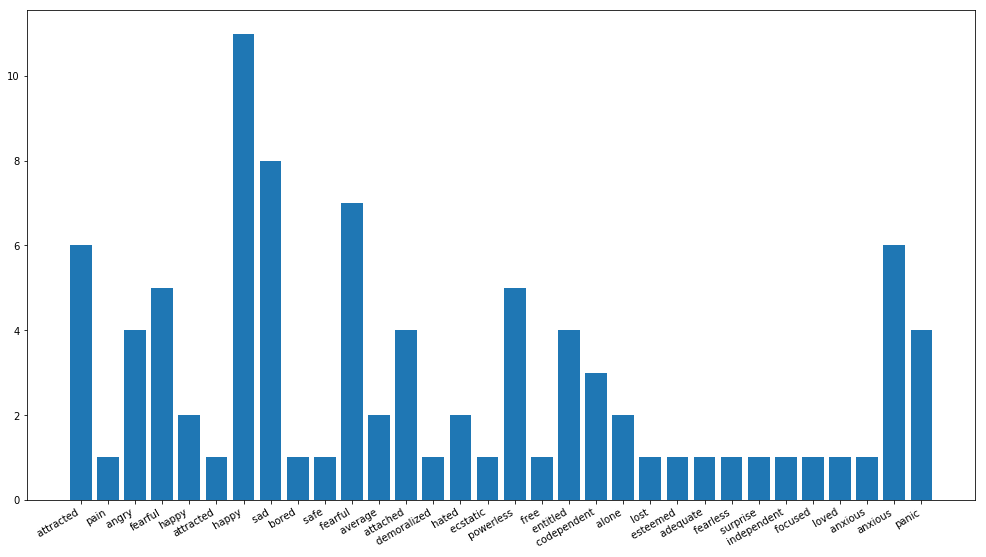

In [50]:
fig, ax1 = plt.subplots(figsize = [17, 10])
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
def text_matrix(text_tweets, countvect):
    terms_doc = countvect.fit_transform(text_tweets)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [53]:
from sklearn.feature_extraction.text import CountVectorizer 

from nltk.corpus import stopwords
import pandas as pd

# Single document (',' seperates each document)
text_tweets
# This step will convert text into tokens 
vect1 = CountVectorizer()
text_tweets=[text_tweets1]
vect1.fit_transform(text_tweets)
print("bag of words :",vect1.get_feature_names())

bag of words : ['00', '000', '000s', '0063985716', '01', '02', '03', '0363', '0766971382', '08027356122', '08159331412', '10', '1000', '100s', '10221821753477010', '10am', '10kg', '10mill', '10sapcko1txt1', '11', '111', '116', '11eco5dczejfd', '11mln', '11pm', '12', '123209', '1243959971324276736', '1244255551782961153', '1244291455511863296', '1244401188004659200', '126', '1280', '13', '1352566462', '137', '13no6yeg3a6o0', '13th', '14', '1499022649', '14days', '15', '150', '159', '16', '16138', '16bar', '16barathome', '16barschallenge', '17', '1760', '177', '17th', '17za98uuqhvyr', '18', '1837r3dhi7xpe', '1855', '18more', '18yo58ph9v526', '19', '1921', '19501e04h3leq', '1bm3ub90w7pli', '1crm3s4219ugx', '1crtwf2eyoil3', '1cwm77hdelgzq', '1dd6', '1fimsxmc8f163', '1future', '1i08tnq8hgto4', '1i6snk6lwhtyy', '1i7yj69y8az9z', '1ilgyvfeuz94t', '1jiulr3ry0z8e', '1kklj3jqwn6m9', '1lgjrlrr2ks0i', '1lz2wg8ht7aq9', '1m', '1m71g4o6nmwpu', '1m8tq5g6g3n8l', '1mo8u1ydb0wkm', '1n88ohqpbwpi4', '1nhjb7

In [54]:
vect1.vocabulary_

{'lockdown': 3311,
 'aniesbaswedan': 483,
 'jokowi': 2973,
 'presiden': 4398,
 'pemerintah': 4205,
 'karantina': 3026,
 'karantinawilayah': 3027,
 'jakarta': 2906,
 'mahfudmd': 3449,
 'polri': 4337,
 'gubernurdki': 2459,
 'dkijakarta': 1710,
 'viruscorona': 5970,
 'covid19': 1388,
 'coronavirus': 1336,
 'corona': 1311,
 'https': 2666,
 'kaltim': 3013,
 'tribunnews': 5688,
 'com': 1206,
 '2020': 101,
 '03': 6,
 '30': 142,
 'bukan': 965,
 'anies': 482,
 'baswedan': 713,
 'surati': 5399,
 'minta': 3661,
 'lakukan': 3174,
 'wilayah': 6159,
 'via': 5934,
 'tribunkaltim': 5687,
 'funny': 2265,
 'funnymemes': 2266,
 'dbnation': 1545,
 'dbfollowtrain': 1544,
 'quarantine': 4512,
 'lockdownhumour': 3323,
 'covid_19': 1407,
 'www': 6237,
 'instagram': 2823,
 'vjzlojg1h': 5981,
 'igshid': 2724,
 'tuumecpn3b0h': 5737,
 'all': 413,
 'for': 2206,
 'protecting': 4459,
 'the': 5522,
 'elderly': 1876,
 'and': 469,
 'vulnerable': 5999,
 'that': 5521,
 'includes': 2767,
 'morale': 3721,
 'but': 982,
 'sa

In [55]:

c_vect = CountVectorizer()

c_vect.fit(text_tweets)

CountVectorizer()

In [58]:
string2 = ['Lets understand  bag']

In [60]:
c_new_vect = c_vect.transform(string2)

print ("Text Present at ",c_new_vect.toarray())

# Compare with the indexes
print ("original indexes", vect1.get_feature_names() )

Text Present at  [[0 0 0 ... 0 0 0]]
original indexes ['00', '000', '000s', '0063985716', '01', '02', '03', '0363', '0766971382', '08027356122', '08159331412', '10', '1000', '100s', '10221821753477010', '10am', '10kg', '10mill', '10sapcko1txt1', '11', '111', '116', '11eco5dczejfd', '11mln', '11pm', '12', '123209', '1243959971324276736', '1244255551782961153', '1244291455511863296', '1244401188004659200', '126', '1280', '13', '1352566462', '137', '13no6yeg3a6o0', '13th', '14', '1499022649', '14days', '15', '150', '159', '16', '16138', '16bar', '16barathome', '16barschallenge', '17', '1760', '177', '17th', '17za98uuqhvyr', '18', '1837r3dhi7xpe', '1855', '18more', '18yo58ph9v526', '19', '1921', '19501e04h3leq', '1bm3ub90w7pli', '1crm3s4219ugx', '1crtwf2eyoil3', '1cwm77hdelgzq', '1dd6', '1fimsxmc8f163', '1future', '1i08tnq8hgto4', '1i6snk6lwhtyy', '1i7yj69y8az9z', '1ilgyvfeuz94t', '1jiulr3ry0z8e', '1kklj3jqwn6m9', '1lgjrlrr2ks0i', '1lz2wg8ht7aq9', '1m', '1m71g4o6nmwpu', '1m8tq5g6g3n8l', '1

In [62]:
## Bag Of Words using stopwords (you can avoid writing extra steps to remove stopwords)

stop_words = stopwords.words('english')

string = ["This is an example of bag of words!"]
vect1 = CountVectorizer(stop_words=stop_words)
print (vect1)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [63]:
vect1.fit_transform(string)
print("bag of words :",vect1.get_feature_names())
print("vocab        :",vect1.vocabulary_)

bag of words : ['bag', 'example', 'words']
vocab        : {'example': 1, 'bag': 0, 'words': 2}


In [64]:
c_vect = CountVectorizer()
print ("Below metrix is the Bag of Words approach")
text_matrix(text_tweets, c_vect)

Below metrix is the Bag of Words approach


,00,000,000s,0063985716,01,02,03,0363,0766971382,08027356122,...,少しでもパークに行った雰囲気を,感染増を回避,新型コロナウイルス,日本,東京,東京オリンピック,東京ディズニーランド,東京ディズニーリゾート,理由分からず,疑似体験
0,3,9,1,2,3,3,15,1,1,1,...,1,1,1,1,1,1,2,1,1,1
